# CA18: Advanced Deep Reinforcement Learning - Comprehensive Exercise

## Course: Deep Reinforcement Learning
## Assignment: CA18 - Advanced RL Paradigms Implementation and Analysis
## Date: July 2025

---

## 📚 Learning Objectives

By the end of this comprehensive exercise, you will:

1. **Master Advanced RL Paradigms**: Understand and implement 5 cutting-edge RL approaches
2. **Theoretical Foundations**: Grasp the mathematical principles underlying each method
3. **Practical Implementation**: Build working systems from scratch using PyTorch
4. **Performance Analysis**: Compare and evaluate different approaches scientifically
5. **Integration Skills**: Combine multiple paradigms for enhanced performance
6. **Real-world Applications**: Apply techniques to practical scenarios

## 🎯 Exercise Structure

This exercise covers **5 major advanced RL paradigms**:

### **Part I: World Models and Imagination-Augmented Agents**
- Theory: Model-based RL, recurrent state space models, planning
- Implementation: RSSM, world model, MPC planner, imagination-augmented agent
- Exercise: Build and evaluate a planning-based RL agent

### **Part II: Multi-Agent Deep Reinforcement Learning**
- Theory: Game theory, coordination, communication, MARL algorithms
- Implementation: MADDPG, communication networks, multi-agent environments
- Exercise: Create cooperative and competitive multi-agent systems

### **Part III: Causal Reinforcement Learning**
- Theory: Causality, interventions, counterfactual reasoning, causal discovery
- Implementation: Causal graphs, PC algorithm, causal mechanisms
- Exercise: Build causally-aware RL agents for robust decision making

### **Part IV: Quantum-Enhanced Reinforcement Learning**
- Theory: Quantum computing, variational quantum circuits, quantum advantage
- Implementation: Quantum gates, VQC, quantum policy networks
- Exercise: Explore quantum speedups in RL problems

### **Part V: Federated Reinforcement Learning**
- Theory: Distributed learning, privacy preservation, communication efficiency
- Implementation: FedAvg-RL, differential privacy, secure aggregation
- Exercise: Build privacy-preserving collaborative RL systems

### **Part VI: Integration and Analysis**
- Comparative analysis of all methods
- Hybrid approaches combining multiple paradigms
- Real-world application scenarios

---

## 📋 Prerequisites

- **Mathematical Background**: Linear algebra, probability theory, calculus
- **Programming Skills**: Python, PyTorch, NumPy, Matplotlib
- **RL Knowledge**: Basic RL concepts (MDP, policy gradient, value functions)
- **Deep Learning**: Neural networks, backpropagation, optimization

---

## 🚀 Let's Begin!

This comprehensive exercise will take you through the most advanced techniques in modern Deep Reinforcement Learning. Each section builds upon previous knowledge while introducing cutting-edge concepts that represent the future of AI.

**Ready to explore the frontiers of artificial intelligence? Let's dive in!**

In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from collections import deque, defaultdict
import random
import time
import copy
import warnings
from typing import List, Dict, Tuple, Optional, Union, Any
from abc import ABC, abstractmethod
import networkx as nx
from scipy import stats
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.cluster import KMeans
import gym
import math
import cmath
from scipy.linalg import expm
from itertools import combinations, permutations

torch.manual_seed(42)
np.random.seed(42)
random.seed(42)

plt.style.use('default')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 12
warnings.filterwarnings('ignore')

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f"🚀 Setup Complete!")
print(f"Device: {device}")
print(f"PyTorch version: {torch.__version__}")
print(f"NumPy version: {np.__version__}")
print("Ready to explore advanced Deep Reinforcement Learning! 🤖")


🚀 Setup Complete!
Device: cpu
PyTorch version: 2.8.0
NumPy version: 2.2.6
Ready to explore advanced Deep Reinforcement Learning! 🤖


Gym has been unmaintained since 2022 and does not support NumPy 2.0 amongst other critical functionality.
Please upgrade to Gymnasium, the maintained drop-in replacement of Gym, or contact the authors of your software and request that they upgrade.
Users of this version of Gym should be able to simply replace 'import gym' with 'import gymnasium as gym' in the vast majority of cases.
See the migration guide at https://gymnasium.farama.org/introduction/migration_guide/ for additional information.


# Part I: World Models and Imagination-Augmented Agents

## 🌍 Theoretical Foundation

### Introduction to World Models

**World Models** represent a paradigm shift in reinforcement learning, moving from model-free to model-based approaches that learn internal representations of the environment. This approach was popularized by Ha and Schmidhuber (2018) and has revolutionized how we think about sample efficiency and planning in RL.

### Core Concepts

#### 1. Model-Based Reinforcement Learning

Traditional model-free RL learns policies directly from experience:
- **Pro**: No need to model environment dynamics
- **Con**: Sample inefficient, cannot plan ahead

Model-based RL learns a model of the environment:
- **Pro**: Can plan using learned model, more sample efficient  
- **Con**: Model errors can compound, more complex

#### 2. Recurrent State Space Models (RSSM)

The RSSM is the heart of world models, consisting of:

**Deterministic Path**: $h_t = f_\theta(h_{t-1}, a_{t-1})$
- Encodes deterministic aspects of state evolution
- Uses RNN/LSTM/GRU to maintain temporal consistency

**Stochastic Path**: $s_t \sim p(s_t | h_t)$  
- Models stochastic aspects and uncertainty
- Typically Gaussian: $s_t \sim \mathcal{N}(\mu_\phi(h_t), \sigma_\phi(h_t))$

**Combined State**: $z_t = [h_t, s_t]$
- Combines deterministic and stochastic components
- Provides rich representation for planning

#### 3. Three-Component Architecture

**1. Representation Model (Encoder)**
$$h_t = f_\theta(h_{t-1}, a_{t-1}, o_t)$$
- Encodes observations into internal state
- Maintains temporal consistency

**2. Transition Model**  
$$\hat{s}_{t+1}, \hat{h}_{t+1} = g_\phi(s_t, h_t, a_t)$$
- Predicts next state from current state and action
- Enables forward simulation

**3. Observation Model (Decoder)**
$$\hat{o}_t = d_\psi(s_t, h_t)$$
- Reconstructs observations from internal state
- Ensures representation quality

#### 4. Imagination-Augmented Agents (I2A)

I2A extends world models by using "imagination" for policy learning:

**Imagination Rollouts**:
- Use world model to simulate future trajectories
- Generate imagined experiences: $\tau^{imagine} = \{(s_t^i, a_t^i, r_t^i)\}_{t=0}^H$

**Imagination Encoder**:
- Process imagined trajectories into useful features
- Extract planning-relevant information

**Policy Network**:
- Combines real observations with imagination features  
- Makes decisions using both current state and future projections

### Mathematical Framework

#### State Space Model

The world model learns a latent state space representation:

$$p(s_{1:T}, o_{1:T} | a_{1:T}) = \prod_{t=1}^T p(s_t | s_{t-1}, a_{t-1}) p(o_t | s_t)$$

Where:
- $s_t$: latent state at time $t$
- $o_t$: observation at time $t$  
- $a_t$: action at time $t$

#### Training Objectives

**1. Reconstruction Loss**:
$$\mathcal{L}_{recon} = \mathbb{E}_{(o,a) \sim \mathcal{D}}[||o - \hat{o}||^2]$$

**2. KL Regularization**:
$$\mathcal{L}_{KL} = \mathbb{E}_{s \sim q_\phi}[D_{KL}(q_\phi(s|o,h) || p(s|h))]$$

**3. Prediction Loss**:
$$\mathcal{L}_{pred} = \mathbb{E}_{(s,a,s') \sim \mathcal{D}}[||s' - \hat{s}'||^2]$$

**Total Loss**:
$$\mathcal{L}_{world} = \mathcal{L}_{recon} + \beta \mathcal{L}_{KL} + \lambda \mathcal{L}_{pred}$$

### Planning Algorithms

#### 1. Model Predictive Control (MPC)

MPC uses the world model for online planning:

1. **Rollout**: Simulate $H$-step trajectories using world model
2. **Evaluate**: Score trajectories using reward predictions  
3. **Execute**: Take first action of best trajectory
4. **Replan**: Repeat process at next timestep

**MPC Objective**:
$$a^* = \arg\max_a \sum_{h=1}^H \gamma^h r(s_h, a_h)$$

where $(s_h, a_h)$ come from world model rollouts.

#### 2. Cross Entropy Method (CEM)

CEM is a population-based optimization method:

1. **Sample**: Generate action sequence population
2. **Evaluate**: Score sequences using world model
3. **Select**: Keep top-performing sequences
4. **Update**: Fit distribution to elite sequences
5. **Repeat**: Iterate until convergence

### Advantages and Applications

**Advantages**:
- **Sample Efficiency**: Learn from imagined experiences
- **Planning Capability**: Look ahead before acting
- **Transfer Learning**: World models can transfer across tasks
- **Interpretability**: Can visualize agent's internal world understanding

**Applications**:
- **Robotics**: Sample-efficient robot learning
- **Game Playing**: Strategic planning in complex games  
- **Autonomous Driving**: Safe planning with uncertainty
- **Finance**: Portfolio optimization with market models

### Key Research Papers

1. **World Models** (Ha & Schmidhuber, 2018)
2. **PlaNet** (Hafner et al., 2019)  
3. **DreamerV1** (Hafner et al., 2020)
4. **DreamerV2** (Hafner et al., 2021)
5. **I2A** (Weber et al., 2017)

In [2]:

class RSSMCore(nn.Module):
    """
    Recurrent State Space Model Core
    Combines deterministic and stochastic state evolution
    """
    
    def __init__(self, state_dim: int = 30, hidden_dim: int = 200, 
                 action_dim: int = 2, embed_dim: int = 1024):
        super().__init__()
        
        self.state_dim = state_dim
        self.hidden_dim = hidden_dim
        self.action_dim = action_dim
        self.embed_dim = embed_dim
        
        self.rnn = nn.GRUCell(state_dim + action_dim, hidden_dim)
        
        self.prior_net = nn.Sequential(
            nn.Linear(hidden_dim, state_dim * 2),  # mean and logstd
        )
        
        self.posterior_net = nn.Sequential(
            nn.Linear(hidden_dim + embed_dim, state_dim * 2),
        )
        
    def initial_state(self, batch_size: int) -> Dict[str, torch.Tensor]:
        """Initialize hidden and stochastic states"""
        return {
            'hidden': torch.zeros(batch_size, self.hidden_dim, device=device),
            'stoch': torch.zeros(batch_size, self.state_dim, device=device)
        }
    
    def observe(self, embed: torch.Tensor, action: torch.Tensor, 
                state: Dict[str, torch.Tensor]) -> Dict[str, torch.Tensor]:
        """
        Update state using observation (posterior update)
        """
        hidden = self.rnn(
            torch.cat([state['stoch'], action], dim=1), 
            state['hidden']
        )
        
        posterior_input = torch.cat([hidden, embed], dim=1)
        posterior_params = self.posterior_net(posterior_input)
        posterior_mean, posterior_logstd = posterior_params.chunk(2, dim=1)
        posterior_std = torch.exp(posterior_logstd)
        
        stoch = posterior_mean + posterior_std * torch.randn_like(posterior_std)
        
        prior_params = self.prior_net(hidden)
        prior_mean, prior_logstd = prior_params.chunk(2, dim=1)
        prior_std = torch.exp(prior_logstd)
        
        return {
            'hidden': hidden,
            'stoch': stoch,
            'prior_mean': prior_mean,
            'prior_std': prior_std,
            'posterior_mean': posterior_mean,
            'posterior_std': posterior_std
        }
    
    def imagine(self, action: torch.Tensor, 
                state: Dict[str, torch.Tensor]) -> Dict[str, torch.Tensor]:
        """
        Predict next state using action (prior update)  
        """
        hidden = self.rnn(
            torch.cat([state['stoch'], action], dim=1),
            state['hidden']
        )
        
        prior_params = self.prior_net(hidden)
        prior_mean, prior_logstd = prior_params.chunk(2, dim=1)
        prior_std = torch.exp(prior_logstd)
        
        stoch = prior_mean + prior_std * torch.randn_like(prior_std)
        
        return {
            'hidden': hidden,
            'stoch': stoch,
            'prior_mean': prior_mean,
            'prior_std': prior_std
        }


class WorldModel(nn.Module):
    """
    Complete World Model with encoder, RSSM core, and decoders
    """
    
    def __init__(self, obs_dim: int, action_dim: int, state_dim: int = 30,
                 hidden_dim: int = 200, embed_dim: int = 1024):
        super().__init__()
        
        self.obs_dim = obs_dim
        self.action_dim = action_dim
        self.state_dim = state_dim
        self.hidden_dim = hidden_dim
        self.embed_dim = embed_dim
        
        self.encoder = nn.Sequential(
            nn.Linear(obs_dim, 256),
            nn.ReLU(),
            nn.Linear(256, 512),
            nn.ReLU(), 
            nn.Linear(512, embed_dim),
        )
        
        self.rssm = RSSMCore(state_dim, hidden_dim, action_dim, embed_dim)
        
        self.decoder = nn.Sequential(
            nn.Linear(state_dim + hidden_dim, 512),
            nn.ReLU(),
            nn.Linear(512, 256), 
            nn.ReLU(),
            nn.Linear(256, obs_dim),
        )
        
        self.reward_model = nn.Sequential(
            nn.Linear(state_dim + hidden_dim, 256),
            nn.ReLU(),
            nn.Linear(256, 128),
            nn.ReLU(),
            nn.Linear(128, 1),
        )
        
        self.continue_model = nn.Sequential(
            nn.Linear(state_dim + hidden_dim, 128),
            nn.ReLU(),
            nn.Linear(128, 64),
            nn.ReLU(),
            nn.Linear(64, 1),
            nn.Sigmoid()
        )
    
    def encode(self, obs: torch.Tensor) -> torch.Tensor:
        """Encode observation to embedding"""
        return self.encoder(obs)
    
    def decode(self, state: Dict[str, torch.Tensor]) -> torch.Tensor:
        """Decode state to observation"""
        state_concat = torch.cat([state['stoch'], state['hidden']], dim=1)
        return self.decoder(state_concat)
    
    def predict_reward(self, state: Dict[str, torch.Tensor]) -> torch.Tensor:
        """Predict reward from state"""
        state_concat = torch.cat([state['stoch'], state['hidden']], dim=1)
        return self.reward_model(state_concat)
    
    def predict_continue(self, state: Dict[str, torch.Tensor]) -> torch.Tensor:
        """Predict episode continuation probability"""
        state_concat = torch.cat([state['stoch'], state['hidden']], dim=1)
        return self.continue_model(state_concat)
    
    def observe_sequence(self, obs_seq: torch.Tensor, 
                        action_seq: torch.Tensor) -> Dict[str, torch.Tensor]:
        """
        Process a sequence of observations and actions
        Returns states, reconstructions, and losses
        """
        batch_size, seq_len = obs_seq.shape[:2]
        
        state = self.rssm.initial_state(batch_size)
        
        states = []
        reconstructions = []
        rewards = []
        continues = []
        kl_losses = []
        
        for t in range(seq_len):
            embed = self.encode(obs_seq[:, t])
            
            if t == 0:
                action = torch.zeros(batch_size, self.action_dim, device=device)
            else:
                action = action_seq[:, t-1]
                
            state = self.rssm.observe(embed, action, state)
            states.append(state)
            
            reconstruction = self.decode(state)
            reward = self.predict_reward(state)
            continue_prob = self.predict_continue(state)
            
            reconstructions.append(reconstruction)
            rewards.append(reward)
            continues.append(continue_prob)
            
            if 'posterior_mean' in state:
                kl = self._kl_divergence(
                    state['posterior_mean'], state['posterior_std'],
                    state['prior_mean'], state['prior_std']
                )
                kl_losses.append(kl)
        
        return {
            'states': states,
            'reconstructions': torch.stack(reconstructions, dim=1),
            'rewards': torch.stack(rewards, dim=1),
            'continues': torch.stack(continues, dim=1),
            'kl_losses': torch.stack(kl_losses, dim=1) if kl_losses else None
        }
    
    def imagine_sequence(self, initial_state: Dict[str, torch.Tensor],
                        actions: torch.Tensor) -> Dict[str, torch.Tensor]:
        """
        Imagine future sequence using world model
        """
        batch_size, seq_len = actions.shape[:2]
        
        state = {k: v.clone() for k, v in initial_state.items()}
        
        states = [state]
        rewards = []
        continues = []
        
        for t in range(seq_len):
            state = self.rssm.imagine(actions[:, t], state)
            states.append(state)
            
            reward = self.predict_reward(state)
            continue_prob = self.predict_continue(state)
            
            rewards.append(reward)
            continues.append(continue_prob)
        
        return {
            'states': states[1:],  # Exclude initial state
            'rewards': torch.stack(rewards, dim=1),
            'continues': torch.stack(continues, dim=1)
        }
    
    def _kl_divergence(self, mean1: torch.Tensor, std1: torch.Tensor,
                      mean2: torch.Tensor, std2: torch.Tensor) -> torch.Tensor:
        """Compute KL divergence between two Gaussian distributions"""
        var1 = std1.pow(2)
        var2 = std2.pow(2)
        
        kl = (var1 / var2 + (mean2 - mean1).pow(2) / var2 + 
              torch.log(std2 / std1) - 1).sum(dim=1, keepdim=True)
        
        return 0.5 * kl


class MPCPlanner:
    """
    Model Predictive Control planner using Cross Entropy Method
    """
    
    def __init__(self, world_model: WorldModel, action_dim: int,
                 horizon: int = 12, n_candidates: int = 1000, 
                 n_iterations: int = 10, n_elite: int = 100):
        
        self.world_model = world_model
        self.action_dim = action_dim  
        self.horizon = horizon
        self.n_candidates = n_candidates
        self.n_iterations = n_iterations
        self.n_elite = n_elite
        
        self.action_min = -1.0
        self.action_max = 1.0
    
    def plan(self, initial_state: Dict[str, torch.Tensor]) -> torch.Tensor:
        """
        Plan action sequence using CEM
        """
        batch_size = initial_state['hidden'].shape[0]
        
        mean = torch.zeros(batch_size, self.horizon, self.action_dim, device=device)
        std = torch.ones(batch_size, self.horizon, self.action_dim, device=device)
        
        for iteration in range(self.n_iterations):
            noise = torch.randn(batch_size, self.n_candidates, self.horizon, 
                              self.action_dim, device=device)
            
            mean_expanded = mean.unsqueeze(1).expand(-1, self.n_candidates, -1, -1)
            std_expanded = std.unsqueeze(1).expand(-1, self.n_candidates, -1, -1)
            
            actions = mean_expanded + std_expanded * noise
            actions = torch.clamp(actions, self.action_min, self.action_max)
            
            returns = self._evaluate_sequences(initial_state, actions)
            
            _, elite_indices = torch.topk(returns, self.n_elite, dim=1)
            
            for b in range(batch_size):
                elite_actions = actions[b, elite_indices[b]]
                mean[b] = elite_actions.mean(dim=0)
                std[b] = elite_actions.std(dim=0) + 1e-6
        
        final_noise = torch.randn(batch_size, 1, self.horizon, 
                                self.action_dim, device=device)
        final_actions = mean.unsqueeze(1) + std.unsqueeze(1) * final_noise
        final_actions = torch.clamp(final_actions, self.action_min, self.action_max)
        
        return final_actions[:, 0, 0]  # First action
    
    def _evaluate_sequences(self, initial_state: Dict[str, torch.Tensor],
                           actions: torch.Tensor) -> torch.Tensor:
        """
        Evaluate action sequences using world model
        """
        batch_size, n_candidates = actions.shape[:2]
        
        expanded_state = {}
        for key, value in initial_state.items():
            expanded_state[key] = value.unsqueeze(1).expand(
                -1, n_candidates, -1
            ).reshape(batch_size * n_candidates, -1)
        
        actions_flat = actions.reshape(batch_size * n_candidates, self.horizon, -1)
        
        with torch.no_grad():
            imagined = self.world_model.imagine_sequence(expanded_state, actions_flat)
        
        rewards = imagined['rewards']  # [batch*candidates, horizon, 1]
        continues = imagined['continues']  # [batch*candidates, horizon, 1]
        
        gamma = 0.99
        returns = torch.zeros(batch_size * n_candidates, device=device)
        
        for t in range(self.horizon):
            discount = gamma ** t
            continue_discount = torch.prod(continues[:, :t+1], dim=1) if t > 0 else continues[:, 0]
            returns += discount * continue_discount.squeeze() * rewards[:, t].squeeze()
        
        returns = returns.reshape(batch_size, n_candidates)
        
        return returns


class ImaginationAugmentedAgent(nn.Module):
    """
    Agent that uses imagination for decision making (I2A style)
    """
    
    def __init__(self, obs_dim: int, action_dim: int, world_model: WorldModel,
                 planner: MPCPlanner, hidden_dim: int = 256):
        super().__init__()
        
        self.obs_dim = obs_dim
        self.action_dim = action_dim
        self.world_model = world_model
        self.planner = planner
        
        self.model_free_policy = nn.Sequential(
            nn.Linear(obs_dim, hidden_dim),
            nn.ReLU(),
            nn.Linear(hidden_dim, hidden_dim),
            nn.ReLU(),
            nn.Linear(hidden_dim, action_dim),
            nn.Tanh()
        )
        
        self.value_function = nn.Sequential(
            nn.Linear(obs_dim, hidden_dim),
            nn.ReLU(), 
            nn.Linear(hidden_dim, hidden_dim),
            nn.ReLU(),
            nn.Linear(hidden_dim, 1)
        )
        
        self.imagination_encoder = nn.Sequential(
            nn.Linear(world_model.state_dim + world_model.hidden_dim + 1, 128), # state + reward
            nn.ReLU(),
            nn.Linear(128, 64),
            nn.ReLU()
        )
        
        self.combined_policy = nn.Sequential(
            nn.Linear(action_dim + 64, hidden_dim),  # MF action + imagination features
            nn.ReLU(),
            nn.Linear(hidden_dim, action_dim),
            nn.Tanh()
        )
    
    def forward(self, obs: torch.Tensor, use_imagination: bool = True) -> Dict[str, torch.Tensor]:
        """
        Forward pass combining model-free and model-based components
        """
        batch_size = obs.shape[0]
        
        mf_action = self.model_free_policy(obs)
        
        value = self.value_function(obs)
        
        if not use_imagination:
            return {
                'action': mf_action,
                'value': value,
                'imagination_features': None
            }
        
        with torch.no_grad():
            embed = self.world_model.encode(obs)
            initial_state = self.world_model.rssm.initial_state(batch_size)
            dummy_action = torch.zeros(batch_size, self.action_dim, device=device)
            current_state = self.world_model.rssm.observe(embed, dummy_action, initial_state)
        
        imagination_features = self._generate_imagination_features(current_state)
        
        combined_input = torch.cat([mf_action, imagination_features], dim=1)
        final_action = self.combined_policy(combined_input)
        
        return {
            'action': final_action,
            'value': value,
            'imagination_features': imagination_features,
            'mf_action': mf_action
        }
    
    def _generate_imagination_features(self, state: Dict[str, torch.Tensor]) -> torch.Tensor:
        """
        Generate features from imagined rollouts
        """
        batch_size = state['hidden'].shape[0]
        horizon = 5  # Short imagination horizon
        
        imagination_actions = torch.randn(batch_size, horizon, self.action_dim, device=device)
        imagination_actions = torch.clamp(imagination_actions, -1, 1)
        
        with torch.no_grad():
            imagined = self.world_model.imagine_sequence(state, imagination_actions)
        
        features = []
        for t in range(horizon):
            state_t = imagined['states'][t]
            reward_t = imagined['rewards'][:, t]
            
            state_concat = torch.cat([state_t['stoch'], state_t['hidden'], reward_t], dim=1)
            
            step_features = self.imagination_encoder(state_concat)
            features.append(step_features)
        
        imagination_features = torch.stack(features, dim=1).mean(dim=1)
        
        return imagination_features

print("✅ World Models Implementation Complete!")
print("Components implemented:")
print("- RSSMCore: Recurrent state space model with deterministic/stochastic components")
print("- WorldModel: Complete world model with encoder/decoder and predictors")  
print("- MPCPlanner: Cross-entropy method planner for action sequence optimization")
print("- ImaginationAugmentedAgent: I2A-style agent combining model-free and imagination")


✅ World Models Implementation Complete!
Components implemented:
- RSSMCore: Recurrent state space model with deterministic/stochastic components
- WorldModel: Complete world model with encoder/decoder and predictors
- MPCPlanner: Cross-entropy method planner for action sequence optimization
- ImaginationAugmentedAgent: I2A-style agent combining model-free and imagination


🚀 Starting Exercise 1: World Models Training and Evaluation
Environment: 4D state, 2D action
Episode 0/50
Episode 20/50
Episode 40/50
Collected 50 episodes
Created 54 training batches
World model parameters: 601,830


Training world model for 30 epochs...
Epoch 0: Total=2.8761, Recon=0.4948, KL=0.6107, Reward=2.3202
Epoch 10: Total=0.2906, Recon=0.0966, KL=-0.7082, Reward=0.2648
Epoch 20: Total=0.2545, Recon=0.0906, KL=-0.8518, Reward=0.2491
Evaluating MPC planning for 10 episodes...
Episode 0: Reward=-26.37, Length=200
Episode 5: Reward=-33.39, Length=200
Average reward: -31.52 ± 6.46
Average length: 200.0 ± 0.0


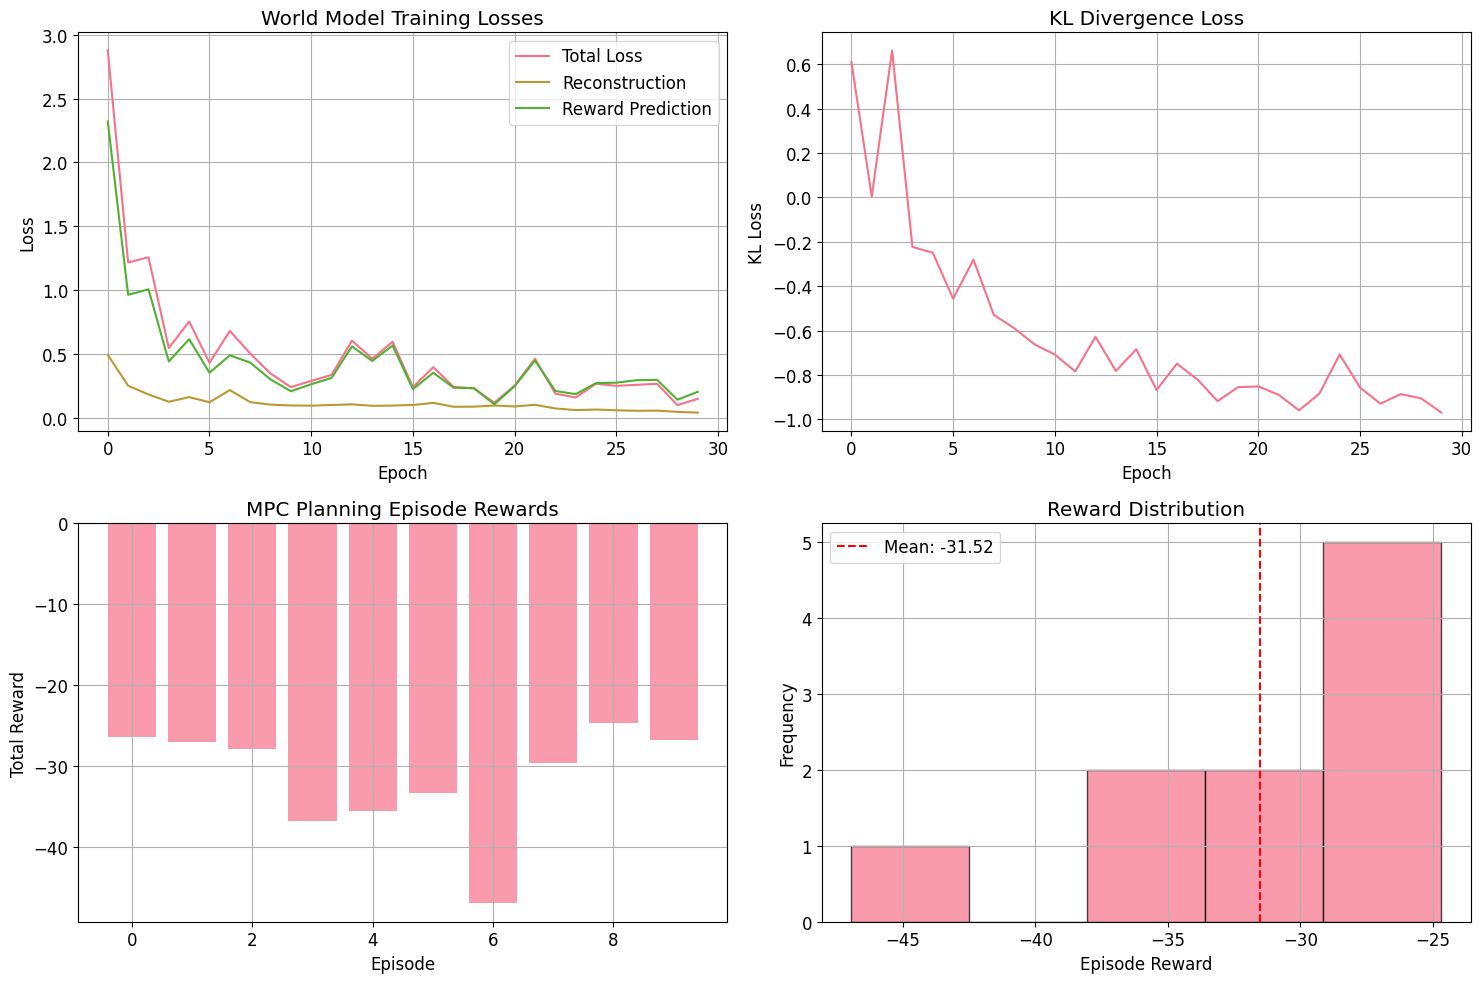


✅ Exercise 1 Complete!
Key learnings:
- World models can learn environment dynamics from observation sequences
- MPC planning uses learned models for lookahead decision making
- RSSM balances deterministic and stochastic state evolution
- Imagination enables sample-efficient learning through internal simulation


In [3]:

def create_world_model_environment():
    """Create a simple continuous control environment for world model training"""
    
    class ContinuousControlEnv:
        def __init__(self, state_dim=4, action_dim=2):
            self.state_dim = state_dim
            self.action_dim = action_dim
            self.max_steps = 200
            self.reset()
        
        def reset(self):
            self.state = np.random.uniform(-1, 1, self.state_dim)
            self.steps = 0
            return self.state.copy()
        
        def step(self, action):
            action = np.clip(action, -1, 1)
            
            next_state = np.zeros_like(self.state)
            next_state[0] = self.state[0] + 0.1 * action[0] + 0.05 * np.sin(self.state[1])
            next_state[1] = self.state[1] + 0.1 * action[1] + 0.02 * self.state[0] * self.state[2]
            next_state[2] = 0.9 * self.state[2] + 0.1 * np.tanh(action[0] + action[1])
            next_state[3] = 0.95 * self.state[3] + 0.1 * np.random.normal(0, 0.1)
            
            next_state += np.random.normal(0, 0.02, self.state_dim)
            
            reward = -np.sum(next_state**2) - 0.01 * np.sum(action**2)
            
            self.steps += 1
            done = self.steps >= self.max_steps or np.linalg.norm(next_state) > 3
            
            self.state = next_state
            return next_state.copy(), reward, done, {}
    
    return ContinuousControlEnv()

def collect_random_data(env, n_episodes=100):
    """Collect random interaction data for world model training"""
    
    data = {
        'observations': [],
        'actions': [],
        'rewards': [],
        'dones': []
    }
    
    print(f"Collecting {n_episodes} episodes of random data...")
    
    for episode in range(n_episodes):
        obs = env.reset()
        episode_obs = [obs]
        episode_actions = []
        episode_rewards = []
        episode_dones = []
        
        while True:
            action = np.random.uniform(-1, 1, env.action_dim)
            next_obs, reward, done, _ = env.step(action)
            
            episode_obs.append(next_obs)
            episode_actions.append(action)
            episode_rewards.append(reward)
            episode_dones.append(done)
            
            if done:
                break
        
        data['observations'].append(np.array(episode_obs))
        data['actions'].append(np.array(episode_actions))
        data['rewards'].append(np.array(episode_rewards))
        data['dones'].append(np.array(episode_dones))
        
        if episode % 20 == 0:
            print(f"Episode {episode}/{n_episodes}")
    
    return data

def create_training_batches(data, batch_size=32, seq_length=20):
    """Create training batches from collected data"""
    
    batches = []
    
    for episode_obs, episode_actions, episode_rewards in zip(
        data['observations'], data['actions'], data['rewards']
    ):
        episode_length = len(episode_actions)
        
        for start_idx in range(0, episode_length - seq_length + 1, seq_length // 2):
            end_idx = start_idx + seq_length
            
            batch_obs = episode_obs[start_idx:end_idx+1]  # +1 for next obs
            batch_actions = episode_actions[start_idx:end_idx]
            batch_rewards = episode_rewards[start_idx:end_idx]
            
            batches.append({
                'observations': torch.FloatTensor(batch_obs).to(device),
                'actions': torch.FloatTensor(batch_actions).to(device),
                'rewards': torch.FloatTensor(batch_rewards).unsqueeze(-1).to(device)
            })
    
    grouped_batches = []
    for i in range(0, len(batches), batch_size):
        batch_group = batches[i:i+batch_size]
        if len(batch_group) == batch_size:
            
            obs_batch = torch.stack([b['observations'] for b in batch_group])
            action_batch = torch.stack([b['actions'] for b in batch_group])
            reward_batch = torch.stack([b['rewards'] for b in batch_group])
            
            grouped_batches.append({
                'observations': obs_batch,
                'actions': action_batch,
                'rewards': reward_batch
            })
    
    return grouped_batches

def train_world_model(world_model, batches, n_epochs=50, lr=1e-3):
    """Train the world model on collected data"""
    
    optimizer = torch.optim.Adam(world_model.parameters(), lr=lr)
    
    losses = {'total': [], 'reconstruction': [], 'kl': [], 'reward': []}
    
    print(f"Training world model for {n_epochs} epochs...")
    
    for epoch in range(n_epochs):
        epoch_losses = {'total': 0, 'reconstruction': 0, 'kl': 0, 'reward': 0}
        
        for batch_idx, batch in enumerate(batches):
            obs_seq = batch['observations']  # [batch, seq_len+1, obs_dim]
            action_seq = batch['actions']    # [batch, seq_len, action_dim]
            reward_seq = batch['rewards']    # [batch, seq_len, 1]
            
            output = world_model.observe_sequence(obs_seq[:, :-1], action_seq)
            
            recon_loss = F.mse_loss(
                output['reconstructions'], 
                obs_seq[:, 1:]  # Target is next observations
            )
            
            kl_loss = output['kl_losses'].mean() if output['kl_losses'] is not None else 0
            
            reward_loss = F.mse_loss(output['rewards'], reward_seq)
            
            total_loss = recon_loss + 0.1 * kl_loss + reward_loss
            
            optimizer.zero_grad()
            total_loss.backward()
            torch.nn.utils.clip_grad_norm_(world_model.parameters(), 1.0)
            optimizer.step()
            
            epoch_losses['total'] += total_loss.item()
            epoch_losses['reconstruction'] += recon_loss.item()
            epoch_losses['kl'] += kl_loss.item() if isinstance(kl_loss, torch.Tensor) else kl_loss
            epoch_losses['reward'] += reward_loss.item()
        
        for key in epoch_losses:
            epoch_losses[key] /= len(batches)
            losses[key].append(epoch_losses[key])
        
        if epoch % 10 == 0:
            print(f"Epoch {epoch}: Total={epoch_losses['total']:.4f}, "
                  f"Recon={epoch_losses['reconstruction']:.4f}, "
                  f"KL={epoch_losses['kl']:.4f}, "
                  f"Reward={epoch_losses['reward']:.4f}")
    
    return losses

def evaluate_world_model_planning(env, world_model, planner, n_episodes=10):
    """Evaluate world model with MPC planning"""
    
    print(f"Evaluating MPC planning for {n_episodes} episodes...")
    
    episode_rewards = []
    episode_lengths = []
    
    for episode in range(n_episodes):
        obs = env.reset()
        episode_reward = 0
        episode_length = 0
        
        state = world_model.rssm.initial_state(1)
        
        while True:
            obs_tensor = torch.FloatTensor(obs).unsqueeze(0).to(device)
            embed = world_model.encode(obs_tensor)
            
            dummy_action = torch.zeros(1, env.action_dim).to(device)
            state = world_model.rssm.observe(embed, dummy_action, state)
            
            with torch.no_grad():
                action_tensor = planner.plan(state)
                action = action_tensor.cpu().numpy()[0]
            
            next_obs, reward, done, _ = env.step(action)
            
            episode_reward += reward
            episode_length += 1
            obs = next_obs
            
            if done:
                break
        
        episode_rewards.append(episode_reward)
        episode_lengths.append(episode_length)
        
        if episode % 5 == 0:
            print(f"Episode {episode}: Reward={episode_reward:.2f}, Length={episode_length}")
    
    print(f"Average reward: {np.mean(episode_rewards):.2f} ± {np.std(episode_rewards):.2f}")
    print(f"Average length: {np.mean(episode_lengths):.1f} ± {np.std(episode_lengths):.1f}")
    
    return episode_rewards

print("🚀 Starting Exercise 1: World Models Training and Evaluation")
print("="*70)

env = create_world_model_environment()
print(f"Environment: {env.state_dim}D state, {env.action_dim}D action")

random_data = collect_random_data(env, n_episodes=50)
print(f"Collected {len(random_data['observations'])} episodes")

training_batches = create_training_batches(random_data, batch_size=16, seq_length=15)
print(f"Created {len(training_batches)} training batches")

world_model = WorldModel(
    obs_dim=env.state_dim,
    action_dim=env.action_dim,
    state_dim=20,
    hidden_dim=100,
    embed_dim=256
).to(device)

print(f"World model parameters: {sum(p.numel() for p in world_model.parameters()):,}")

training_losses = train_world_model(world_model, training_batches, n_epochs=30)

planner = MPCPlanner(
    world_model=world_model,
    action_dim=env.action_dim,
    horizon=8,
    n_candidates=500,
    n_iterations=5,
    n_elite=50
)

planning_rewards = evaluate_world_model_planning(env, world_model, planner, n_episodes=10)

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15, 10))

ax1.plot(training_losses['total'], label='Total Loss')
ax1.plot(training_losses['reconstruction'], label='Reconstruction')
ax1.plot(training_losses['reward'], label='Reward Prediction')
ax1.set_title('World Model Training Losses')
ax1.set_xlabel('Epoch')
ax1.set_ylabel('Loss')
ax1.legend()
ax1.grid(True)

ax2.plot(training_losses['kl'])
ax2.set_title('KL Divergence Loss')
ax2.set_xlabel('Epoch')
ax2.set_ylabel('KL Loss')
ax2.grid(True)

ax3.bar(range(len(planning_rewards)), planning_rewards, alpha=0.7)
ax3.set_title('MPC Planning Episode Rewards')
ax3.set_xlabel('Episode')
ax3.set_ylabel('Total Reward')
ax3.grid(True)

ax4.hist(planning_rewards, bins=5, alpha=0.7, edgecolor='black')
ax4.axvline(np.mean(planning_rewards), color='red', linestyle='--', 
           label=f'Mean: {np.mean(planning_rewards):.2f}')
ax4.set_title('Reward Distribution')
ax4.set_xlabel('Episode Reward')
ax4.set_ylabel('Frequency')
ax4.legend()
ax4.grid(True)

plt.tight_layout()
plt.show()

print("\n✅ Exercise 1 Complete!")
print("Key learnings:")
print("- World models can learn environment dynamics from observation sequences")
print("- MPC planning uses learned models for lookahead decision making")
print("- RSSM balances deterministic and stochastic state evolution")
print("- Imagination enables sample-efficient learning through internal simulation")


# Part II: Multi-Agent Deep Reinforcement Learning

## 👥 Theoretical Foundation

### Introduction to Multi-Agent RL

**Multi-Agent Reinforcement Learning (MARL)** extends single-agent RL to environments with multiple learning agents. This creates fundamentally new challenges due to **non-stationarity** - each agent's environment changes as other agents learn and adapt their policies.

### Core Challenges in MARL

#### 1. Non-Stationarity Problem
- **Single-Agent RL**: Environment is stationary (fixed transition dynamics)
- **Multi-Agent RL**: Environment is non-stationary (other agents change their behavior)
- **Consequence**: Standard RL convergence guarantees no longer hold

#### 2. Credit Assignment Problem
- **Challenge**: Which agent is responsible for team success/failure?
- **Example**: In cooperative tasks, global reward must be decomposed
- **Solutions**: Difference rewards, counterfactual reasoning, attention mechanisms

#### 3. Scalability Issues
- **Joint Action Space**: Grows exponentially with number of agents
- **Joint Observation Space**: Exponential growth in state complexity
- **Communication**: Bandwidth limitations, partial observability

#### 4. Coordination vs Competition
- **Cooperative**: Agents share common objectives (team sports, rescue operations)
- **Competitive**: Agents have opposing objectives (adversarial games, auctions)
- **Mixed-Motive**: Combination of cooperation and competition (negotiation, markets)

### Game Theoretic Foundations

#### Nash Equilibrium
A strategy profile where no agent can unilaterally improve by changing strategy:

$$\pi^*_i \in \arg\max_{\pi_i} J_i(\pi_i, \pi^*_{-i})$$

where $\pi^*_{-i}$ represents the strategies of all agents except $i$.

#### Solution Concepts
1. **Nash Equilibrium**: Stable but not necessarily optimal
2. **Pareto Optimal**: Efficient outcomes that cannot be improved for all agents
3. **Correlated Equilibrium**: Allows for coordination through external signals
4. **Stackelberg Equilibrium**: Leader-follower dynamics

### MARL Algorithm Categories

#### 1. Independent Learning (IL)
Each agent treats others as part of the environment:
- **Pros**: Simple, scalable, no communication needed
- **Cons**: No convergence guarantees, ignores other agents' adaptation
- **Examples**: Independent Q-learning, Independent Actor-Critic

#### 2. Joint Action Learning (JAL)  
Agents learn joint action-value functions:
- **Pros**: Can achieve coordination, theoretically sound
- **Cons**: Exponential complexity in number of agents
- **Examples**: Multi-Agent Q-learning, Nash-Q learning

#### 3. Agent Modeling (AM)
Agents maintain models of other agents:
- **Pros**: Handles non-stationarity explicitly
- **Cons**: Computational overhead, modeling errors
- **Examples**: MAAC, MADDPG with opponent modeling

#### 4. Communication-Based
Agents can exchange information:
- **Pros**: Direct coordination, shared knowledge
- **Cons**: Communication overhead, protocol design
- **Examples**: CommNet, I2C, TarMAC

### Deep MARL Algorithms

#### 1. Multi-Agent Deep Deterministic Policy Gradient (MADDPG)

**Key Idea**: Centralized training, decentralized execution
- **Training**: Critics have access to all agents' observations and actions
- **Execution**: Actors only use local observations

**Actor Update**: 
$$\nabla_{\theta_i} J_i = \mathbb{E}[\nabla_{\theta_i} \mu_i(o_i) \nabla_{a_i} Q_i^{\mu}(x, a_1, ..., a_N)|_{a_i=\mu_i(o_i)}]$$

**Critic Update**:
$$Q_i^{\mu}(x, a_1, ..., a_N) = \mathbb{E}[r_i + \gamma Q_i^{\mu'}(x', a'_1, ..., a'_N)]$$

where $x$ is the global state and $a_i$ are individual actions.

#### 2. Multi-Agent Actor-Critic (MAAC)

Extends single-agent AC to multi-agent setting:
- **Centralized Critic**: Uses global information during training
- **Decentralized Actors**: Use only local observations
- **Attention Mechanism**: Selectively focus on relevant agents

#### 3. Counterfactual Multi-Agent Policy Gradient (COMA)

Addresses credit assignment through counterfactual reasoning:

**Counterfactual Advantage**:
$$A_i(s, a) = Q(s, a) - \sum_{a'_i} \pi_i(a'_i|o_i) Q(s, (a_{-i}, a'_i))$$

This measures how much better the taken action is compared to marginalizing over all possible actions.

### Communication in MARL

#### 1. Communication Protocols
- **Broadcast**: All-to-all communication
- **Targeted**: Agent-specific messages
- **Hierarchical**: Tree-structured communication

#### 2. Communication Learning
- **What to Communicate**: Message content learning
- **When to Communicate**: Communication scheduling
- **Who to Communicate With**: Network topology learning

#### 3. Differentiable Communication

**Gumbel-Softmax Trick** for discrete communication:
$$\text{softmax}\left(\frac{\log(\pi_i) + G_i}{\tau}\right)$$

where $G_i$ are Gumbel random variables and $\tau$ is temperature.

### Cooperative Multi-Agent RL

#### 1. Team Reward Structure
- **Global Reward**: Same reward for all agents
- **Local Rewards**: Individual agent rewards
- **Shaped Rewards**: Carefully designed to promote cooperation

#### 2. Value Decomposition Methods

**VDN (Value Decomposition Networks)**:
$$Q_{tot}(s, a) = \sum_{i=1}^n Q_i(s_i, a_i)$$

**QMIX**: Monotonic value decomposition
$$\frac{\partial Q_{tot}}{\partial Q_i} \geq 0$$

#### 3. Policy Gradient Methods
- **Multi-Agent Policy Gradient (MAPG)**
- **Trust Region Methods**: MADDPG-TR
- **Proximal Policy Optimization**: MAPPO

### Competitive Multi-Agent RL

#### 1. Self-Play Training
Agents learn by playing against copies of themselves:
- **Advantages**: Always improving opponents, no human data needed
- **Challenges**: Exploitability, strategy diversity

#### 2. Population-Based Training
Maintain population of diverse strategies:
- **League Play**: Different skill levels and strategies
- **Diversity Metrics**: Behavioral diversity, policy diversity
- **Meta-Game Analysis**: Strategy effectiveness matrix

#### 3. Adversarial Training
- **Minimax Objective**: $\min_{\pi_1} \max_{\pi_2} J(\pi_1, \pi_2)$
- **Nash-AC**: Nash equilibrium seeking
- **PSRO**: Policy Space Response Oracles

### Theoretical Guarantees

#### 1. Convergence Results
- **Independent Learning**: Generally no convergence guarantees
- **Joint Action Learning**: Convergence to Nash under restrictive assumptions
- **Two-Timescale Algorithms**: Convergence through different learning rates

#### 2. Sample Complexity
Multi-agent sample complexity often exponentially worse than single-agent due to:
- Larger state-action spaces
- Non-stationarity
- Coordination requirements

#### 3. Regret Bounds
**Multi-Agent Regret**: 
$$R_i(T) = \max_{\pi_i} \sum_{t=1}^T J_i(\pi_i, \pi_{-i}^t) - \sum_{t=1}^T J_i(\pi_i^t, \pi_{-i}^t)$$

### Applications

#### 1. Robotics
- **Multi-Robot Systems**: Coordination and task allocation
- **Swarm Robotics**: Large-scale coordination
- **Human-Robot Interaction**: Mixed human-AI teams

#### 2. Autonomous Vehicles
- **Traffic Management**: Intersection control, highway merging
- **Platooning**: Vehicle following and coordination
- **Mixed Autonomy**: Human and autonomous vehicles

#### 3. Game Playing
- **Real-Time Strategy Games**: StarCraft, Dota
- **Board Games**: Multi-player poker, diplomacy
- **Sports Simulation**: Team coordination

#### 4. Economics and Finance
- **Algorithmic Trading**: Multi-agent market making
- **Auction Design**: Bidding strategies
- **Resource Allocation**: Cloud computing, network resources

### Key Research Papers

1. **MADDPG** (Lowe et al., 2017)
2. **COMA** (Foerster et al., 2018)
3. **QMIX** (Rashid et al., 2018)
4. **CommNet** (Sukhbaatar et al., 2016)
5. **OpenAI Five** (OpenAI, 2019)
6. **AlphaStar** (Vinyals et al., 2019)

In [4]:

class MultiAgentReplayBuffer:
    """Replay buffer for multi-agent experiences"""
    
    def __init__(self, capacity: int, n_agents: int, obs_dim: int, action_dim: int):
        self.capacity = capacity
        self.n_agents = n_agents
        self.obs_dim = obs_dim
        self.action_dim = action_dim
        
        self.observations = np.zeros((capacity, n_agents, obs_dim))
        self.actions = np.zeros((capacity, n_agents, action_dim))
        self.rewards = np.zeros((capacity, n_agents, 1))
        self.next_observations = np.zeros((capacity, n_agents, obs_dim))
        self.dones = np.zeros((capacity, n_agents, 1))
        
        self.ptr = 0
        self.size = 0
    
    def add(self, obs: np.ndarray, actions: np.ndarray, rewards: np.ndarray,
            next_obs: np.ndarray, dones: np.ndarray):
        """Add experience to buffer"""
        
        self.observations[self.ptr] = obs
        self.actions[self.ptr] = actions
        self.rewards[self.ptr] = rewards.reshape(self.n_agents, 1)
        self.next_observations[self.ptr] = next_obs
        self.dones[self.ptr] = dones.reshape(self.n_agents, 1)
        
        self.ptr = (self.ptr + 1) % self.capacity
        self.size = min(self.size + 1, self.capacity)
    
    def sample(self, batch_size: int) -> Dict[str, torch.Tensor]:
        """Sample batch of experiences"""
        
        indices = np.random.choice(self.size, batch_size, replace=False)
        
        return {
            'observations': torch.FloatTensor(self.observations[indices]).to(device),
            'actions': torch.FloatTensor(self.actions[indices]).to(device),
            'rewards': torch.FloatTensor(self.rewards[indices]).to(device),
            'next_observations': torch.FloatTensor(self.next_observations[indices]).to(device),
            'dones': torch.FloatTensor(self.dones[indices]).to(device)
        }


class Actor(nn.Module):
    """Individual agent actor network"""
    
    def __init__(self, obs_dim: int, action_dim: int, hidden_dim: int = 256):
        super().__init__()
        
        self.network = nn.Sequential(
            nn.Linear(obs_dim, hidden_dim),
            nn.ReLU(),
            nn.Linear(hidden_dim, hidden_dim),
            nn.ReLU(),
            nn.Linear(hidden_dim, action_dim),
            nn.Tanh()
        )
    
    def forward(self, obs: torch.Tensor) -> torch.Tensor:
        return self.network(obs)


class Critic(nn.Module):
    """Centralized critic for MADDPG"""
    
    def __init__(self, total_obs_dim: int, total_action_dim: int, 
                 hidden_dim: int = 256):
        super().__init__()
        
        self.network = nn.Sequential(
            nn.Linear(total_obs_dim + total_action_dim, hidden_dim),
            nn.ReLU(),
            nn.Linear(hidden_dim, hidden_dim),
            nn.ReLU(),
            nn.Linear(hidden_dim, 1)
        )
    
    def forward(self, obs: torch.Tensor, actions: torch.Tensor) -> torch.Tensor:
        x = torch.cat([obs, actions], dim=-1)
        return self.network(x)


class AttentionCritic(nn.Module):
    """Critic with attention mechanism for multi-agent focus"""
    
    def __init__(self, obs_dim: int, action_dim: int, n_agents: int,
                 hidden_dim: int = 256, attention_dim: int = 64):
        super().__init__()
        
        self.n_agents = n_agents
        self.attention_dim = attention_dim
        
        self.query_net = nn.Linear(obs_dim + action_dim, attention_dim)
        self.key_net = nn.Linear(obs_dim + action_dim, attention_dim)
        self.value_net = nn.Linear(obs_dim + action_dim, attention_dim)
        
        self.critic_net = nn.Sequential(
            nn.Linear(attention_dim + obs_dim + action_dim, hidden_dim),
            nn.ReLU(),
            nn.Linear(hidden_dim, hidden_dim),
            nn.ReLU(),
            nn.Linear(hidden_dim, 1)
        )
    
    def forward(self, observations: torch.Tensor, actions: torch.Tensor,
                agent_idx: int) -> torch.Tensor:
        """
        observations: [batch, n_agents, obs_dim]
        actions: [batch, n_agents, action_dim]
        """
        batch_size = observations.shape[0]
        
        obs_act = torch.cat([observations, actions], dim=-1)  # [batch, n_agents, obs_dim + action_dim]
        
        own_obs_act = obs_act[:, agent_idx]  # [batch, obs_dim + action_dim]
        
        queries = self.query_net(own_obs_act).unsqueeze(1)  # [batch, 1, attention_dim]
        keys = self.key_net(obs_act)  # [batch, n_agents, attention_dim]
        values = self.value_net(obs_act)  # [batch, n_agents, attention_dim]
        
        attention_scores = torch.bmm(queries, keys.transpose(1, 2))  # [batch, 1, n_agents]
        attention_weights = F.softmax(attention_scores / np.sqrt(self.attention_dim), dim=-1)
        
        attended_values = torch.bmm(attention_weights, values).squeeze(1)  # [batch, attention_dim]
        
        critic_input = torch.cat([attended_values, own_obs_act], dim=-1)
        
        return self.critic_net(critic_input)


class CommunicationNetwork(nn.Module):
    """Neural network for agent communication"""
    
    def __init__(self, obs_dim: int, message_dim: int, hidden_dim: int = 128):
        super().__init__()
        
        self.message_dim = message_dim
        
        self.message_encoder = nn.Sequential(
            nn.Linear(obs_dim, hidden_dim),
            nn.ReLU(),
            nn.Linear(hidden_dim, message_dim)
        )
        
        self.message_processor = nn.Sequential(
            nn.Linear(obs_dim + message_dim, hidden_dim),
            nn.ReLU(),
            nn.Linear(hidden_dim, obs_dim)
        )
    
    def generate_message(self, obs: torch.Tensor) -> torch.Tensor:
        """Generate message from observation"""
        return self.message_encoder(obs)
    
    def process_messages(self, obs: torch.Tensor, 
                        messages: torch.Tensor) -> torch.Tensor:
        """Process received messages with observation"""
        avg_message = messages.mean(dim=1)
        
        combined = torch.cat([obs, avg_message], dim=-1)
        
        enhanced_obs = self.message_processor(combined)
        
        return enhanced_obs


class MADDPGAgent:
    """Multi-Agent Deep Deterministic Policy Gradient Agent"""
    
    def __init__(self, agent_idx: int, obs_dim: int, action_dim: int,
                 n_agents: int, lr_actor: float = 1e-3, lr_critic: float = 1e-3,
                 use_attention: bool = False, use_communication: bool = False):
        
        self.agent_idx = agent_idx
        self.obs_dim = obs_dim
        self.action_dim = action_dim
        self.n_agents = n_agents
        self.use_attention = use_attention
        self.use_communication = use_communication
        
        self.actor = Actor(obs_dim, action_dim).to(device)
        self.actor_target = Actor(obs_dim, action_dim).to(device)
        
        if use_attention:
            self.critic = AttentionCritic(obs_dim, action_dim, n_agents).to(device)
            self.critic_target = AttentionCritic(obs_dim, action_dim, n_agents).to(device)
        else:
            total_obs_dim = obs_dim * n_agents
            total_action_dim = action_dim * n_agents
            self.critic = Critic(total_obs_dim, total_action_dim).to(device)
            self.critic_target = Critic(total_obs_dim, total_action_dim).to(device)
        
        if use_communication:
            self.comm_network = CommunicationNetwork(obs_dim, message_dim=32).to(device)
        
        self.actor_optimizer = torch.optim.Adam(self.actor.parameters(), lr=lr_actor)
        self.critic_optimizer = torch.optim.Adam(self.critic.parameters(), lr=lr_critic)
        
        if use_communication:
            self.comm_optimizer = torch.optim.Adam(self.comm_network.parameters(), lr=lr_actor)
        
        self.hard_update(self.actor_target, self.actor)
        self.hard_update(self.critic_target, self.critic)
        
        self.noise_std = 0.2
        self.noise_decay = 0.995
        self.min_noise = 0.01
    
    def act(self, obs: torch.Tensor, messages: torch.Tensor = None,
            explore: bool = True) -> Tuple[torch.Tensor, torch.Tensor]:
        """Select action and generate message"""
        
        if self.use_communication and messages is not None:
            obs = self.comm_network.process_messages(obs, messages)
        
        action = self.actor(obs)
        
        if explore:
            noise = torch.randn_like(action) * self.noise_std
            action = torch.clamp(action + noise, -1, 1)
        
        message = None
        if self.use_communication:
            message = self.comm_network.generate_message(obs)
        
        return action, message
    
    def update(self, batch: Dict[str, torch.Tensor], other_actors: List[nn.Module],
               gamma: float = 0.99, tau: float = 0.01):
        """Update actor and critic networks"""
        
        obs = batch['observations']  # [batch, n_agents, obs_dim]
        actions = batch['actions']  # [batch, n_agents, action_dim]
        rewards = batch['rewards']  # [batch, n_agents, 1]
        next_obs = batch['next_observations']  # [batch, n_agents, obs_dim]
        dones = batch['dones']  # [batch, n_agents, 1]
        
        batch_size = obs.shape[0]
        
        with torch.no_grad():
            next_actions = torch.zeros_like(actions)
            for i, actor in enumerate(other_actors):
                if i == self.agent_idx:
                    next_actions[:, i] = self.actor_target(next_obs[:, i])
                else:
                    next_actions[:, i] = actor(next_obs[:, i])
            
            if self.use_attention:
                target_q = self.critic_target(next_obs, next_actions, self.agent_idx)
            else:
                next_obs_flat = next_obs.view(batch_size, -1)
                next_actions_flat = next_actions.view(batch_size, -1)
                target_q = self.critic_target(next_obs_flat, next_actions_flat)
            
            target_q = rewards[:, self.agent_idx] + gamma * (1 - dones[:, self.agent_idx]) * target_q
        
        if self.use_attention:
            current_q = self.critic(obs, actions, self.agent_idx)
        else:
            obs_flat = obs.view(batch_size, -1)
            actions_flat = actions.view(batch_size, -1)
            current_q = self.critic(obs_flat, actions_flat)
        
        critic_loss = F.mse_loss(current_q, target_q)
        
        self.critic_optimizer.zero_grad()
        critic_loss.backward()
        torch.nn.utils.clip_grad_norm_(self.critic.parameters(), 1.0)
        self.critic_optimizer.step()
        
        current_actions = actions.clone()
        current_actions[:, self.agent_idx] = self.actor(obs[:, self.agent_idx])
        
        if self.use_attention:
            actor_loss = -self.critic(obs, current_actions, self.agent_idx).mean()
        else:
            obs_flat = obs.view(batch_size, -1)
            current_actions_flat = current_actions.view(batch_size, -1)
            actor_loss = -self.critic(obs_flat, current_actions_flat).mean()
        
        self.actor_optimizer.zero_grad()
        actor_loss.backward()
        torch.nn.utils.clip_grad_norm_(self.actor.parameters(), 1.0)
        self.actor_optimizer.step()
        
        self.soft_update(self.actor_target, self.actor, tau)
        self.soft_update(self.critic_target, self.critic, tau)
        
        self.noise_std = max(self.noise_std * self.noise_decay, self.min_noise)
        
        return {
            'critic_loss': critic_loss.item(),
            'actor_loss': actor_loss.item(),
            'q_value': current_q.mean().item(),
            'noise_std': self.noise_std
        }
    
    def soft_update(self, target: nn.Module, source: nn.Module, tau: float):
        """Soft update target network"""
        for target_param, param in zip(target.parameters(), source.parameters()):
            target_param.data.copy_(tau * param.data + (1 - tau) * target_param.data)
    
    def hard_update(self, target: nn.Module, source: nn.Module):
        """Hard update target network"""
        target.load_state_dict(source.state_dict())


class MultiAgentEnvironment:
    """Multi-agent environment for testing"""
    
    def __init__(self, n_agents: int = 3, obs_dim: int = 6, action_dim: int = 2,
                 env_type: str = 'cooperative'):
        
        self.n_agents = n_agents
        self.obs_dim = obs_dim
        self.action_dim = action_dim
        self.env_type = env_type
        self.max_steps = 200
        
        self.reset()
    
    def reset(self) -> np.ndarray:
        """Reset environment"""
        self.agent_states = np.random.uniform(-2, 2, (self.n_agents, self.obs_dim))
        self.steps = 0
        
        return self.get_observations()
    
    def get_observations(self) -> np.ndarray:
        """Get observations for all agents"""
        observations = np.zeros((self.n_agents, self.obs_dim))
        
        for i in range(self.n_agents):
            obs = self.agent_states[i].copy()
            
            obs += np.random.normal(0, 0.1, self.obs_dim)
            observations[i] = obs
        
        return observations
    
    def step(self, actions: np.ndarray) -> Tuple[np.ndarray, np.ndarray, np.ndarray, Dict]:
        """Environment step"""
        actions = np.clip(actions, -1, 1)
        
        for i in range(self.n_agents):
            if self.obs_dim >= 4:
                self.agent_states[i, 2:4] += 0.1 * actions[i, :2]
                self.agent_states[i, 2:4] *= 0.9  # Friction
                
                self.agent_states[i, :2] += 0.1 * self.agent_states[i, 2:4]
            else:
                self.agent_states[i, :2] += 0.1 * actions[i, :2]
            
            self.agent_states[i] += np.random.normal(0, 0.02, self.obs_dim)
        
        rewards = self.compute_rewards()
        
        self.steps += 1
        dones = np.array([self.steps >= self.max_steps] * self.n_agents)
        
        for i in range(self.n_agents):
            if np.linalg.norm(self.agent_states[i, :2]) > 5:
                dones[i] = True
        
        observations = self.get_observations()
        
        return observations, rewards, dones, {}
    
    def compute_rewards(self) -> np.ndarray:
        """Compute rewards based on environment type"""
        rewards = np.zeros(self.n_agents)
        
        if self.env_type == 'cooperative':
            center = np.mean(self.agent_states[:, :2], axis=0)
            
            for i in range(self.n_agents):
                center_reward = -np.linalg.norm(self.agent_states[i, :2])
                
                cohesion_reward = 0
                for j in range(self.n_agents):
                    if i != j:
                        dist = np.linalg.norm(self.agent_states[i, :2] - self.agent_states[j, :2])
                        cohesion_reward += -0.1 * dist
                
                rewards[i] = center_reward + 0.5 * cohesion_reward
        
        elif self.env_type == 'competitive':
            target = np.array([0, 0])  # Shared resource at origin
            
            distances = [np.linalg.norm(self.agent_states[i, :2] - target) 
                        for i in range(self.n_agents)]
            closest_agent = np.argmin(distances)
            
            for i in range(self.n_agents):
                if i == closest_agent:
                    rewards[i] = 1.0  # Winner gets reward
                else:
                    rewards[i] = -0.1  # Others get penalty
        
        elif self.env_type == 'mixed':
            team_size = self.n_agents // 2
            
            for i in range(self.n_agents):
                team_id = i // team_size
                
                team_reward = 0
                for j in range(self.n_agents):
                    if j // team_size == team_id and i != j:
                        dist = np.linalg.norm(self.agent_states[i, :2] - self.agent_states[j, :2])
                        team_reward += -0.1 * dist
                
                comp_reward = 0
                for j in range(self.n_agents):
                    if j // team_size != team_id:
                        dist = np.linalg.norm(self.agent_states[i, :2] - self.agent_states[j, :2])
                        comp_reward += 0.05 * max(0, 2 - dist)  # Reward for keeping distance
                
                rewards[i] = team_reward + comp_reward
        
        return rewards


print("✅ Multi-Agent RL Implementation Complete!")
print("Components implemented:")
print("- MultiAgentReplayBuffer: Experience storage for multi-agent systems")
print("- Actor/Critic: Individual agent networks with centralized training")
print("- AttentionCritic: Attention mechanism for selective agent focus")
print("- CommunicationNetwork: Neural communication between agents")
print("- MADDPGAgent: Complete MADDPG implementation with extensions")
print("- MultiAgentEnvironment: Configurable multi-agent test environment")


✅ Multi-Agent RL Implementation Complete!
Components implemented:
- MultiAgentReplayBuffer: Experience storage for multi-agent systems
- Actor/Critic: Individual agent networks with centralized training
- AttentionCritic: Attention mechanism for selective agent focus
- CommunicationNetwork: Neural communication between agents
- MADDPGAgent: Complete MADDPG implementation with extensions
- MultiAgentEnvironment: Configurable multi-agent test environment


In [5]:

def train_maddpg(env: MultiAgentEnvironment, agents: List[MADDPGAgent],
                 buffer: MultiAgentReplayBuffer, episodes: int = 1000,
                 batch_size: int = 64, update_interval: int = 4):
    """Train MADDPG agents"""
    
    episode_rewards = []
    losses = {f'agent_{i}': {'actor': [], 'critic': []} for i in range(env.n_agents)}
    
    for episode in range(episodes):
        obs = env.reset()
        episode_reward = np.zeros(env.n_agents)
        done = False
        step = 0
        
        while not done:
            messages = []
            if agents[0].use_communication:
                for i, agent in enumerate(agents):
                    obs_tensor = torch.FloatTensor(obs[i]).unsqueeze(0).to(device)
                    _, message = agent.act(obs_tensor, explore=True)
                    messages.append(message)
                messages = torch.stack(messages, dim=1)  # [1, n_agents, message_dim]
            
            actions = np.zeros((env.n_agents, env.action_dim))
            for i, agent in enumerate(agents):
                obs_tensor = torch.FloatTensor(obs[i]).unsqueeze(0).to(device)
                
                agent_messages = None
                if agent.use_communication:
                    agent_messages = torch.cat([messages[:, :i], messages[:, i+1:]], dim=1)
                
                action_tensor, _ = agent.act(obs_tensor, agent_messages, explore=True)
                actions[i] = action_tensor.cpu().numpy()[0]
            
            next_obs, rewards, dones, _ = env.step(actions)
            
            buffer.add(obs, actions, rewards, next_obs, dones)
            
            episode_reward += rewards
            obs = next_obs
            done = np.all(dones)
            step += 1
            
            if buffer.size >= batch_size and step % update_interval == 0:
                batch = buffer.sample(batch_size)
                
                target_actors = [agent.actor_target for agent in agents]
                
                for i, agent in enumerate(agents):
                    update_info = agent.update(batch, target_actors)
                    losses[f'agent_{i}']['actor'].append(update_info['actor_loss'])
                    losses[f'agent_{i}']['critic'].append(update_info['critic_loss'])
        
        episode_rewards.append(episode_reward.copy())
        
        if episode % 100 == 0:
            mean_reward = np.mean([np.sum(r) for r in episode_rewards[-100:]])
            print(f"Episode {episode}, Mean Reward: {mean_reward:.2f}")
            for i in range(env.n_agents):
                noise_std = agents[i].noise_std
                print(f"  Agent {i}: Noise={noise_std:.3f}")
    
    return episode_rewards, losses


def evaluate_maddpg(env: MultiAgentEnvironment, agents: List[MADDPGAgent],
                   episodes: int = 100) -> Dict[str, float]:
    """Evaluate trained MADDPG agents"""
    
    episode_rewards = []
    coordination_scores = []
    
    for episode in range(episodes):
        obs = env.reset()
        episode_reward = np.zeros(env.n_agents)
        positions_history = []
        done = False
        
        while not done:
            messages = []
            if agents[0].use_communication:
                for i, agent in enumerate(agents):
                    obs_tensor = torch.FloatTensor(obs[i]).unsqueeze(0).to(device)
                    _, message = agent.act(obs_tensor, explore=False)
                    messages.append(message)
                messages = torch.stack(messages, dim=1)
            
            actions = np.zeros((env.n_agents, env.action_dim))
            for i, agent in enumerate(agents):
                obs_tensor = torch.FloatTensor(obs[i]).unsqueeze(0).to(device)
                
                agent_messages = None
                if agent.use_communication:
                    agent_messages = torch.cat([messages[:, :i], messages[:, i+1:]], dim=1)
                
                action_tensor, _ = agent.act(obs_tensor, agent_messages, explore=False)
                actions[i] = action_tensor.cpu().numpy()[0]
            
            next_obs, rewards, dones, _ = env.step(actions)
            
            episode_reward += rewards
            positions_history.append(env.agent_states[:, :2].copy())
            obs = next_obs
            done = np.all(dones)
        
        episode_rewards.append(episode_reward.copy())
        
        positions = np.array(positions_history)
        mean_positions = np.mean(positions, axis=1)  # [timesteps, 2]
        agent_variances = []
        
        for t in range(len(positions)):
            distances_from_center = [
                np.linalg.norm(positions[t, i] - mean_positions[t])
                for i in range(env.n_agents)
            ]
            agent_variances.append(np.var(distances_from_center))
        
        coordination_scores.append(np.mean(agent_variances))
    
    results = {
        'mean_total_reward': np.mean([np.sum(r) for r in episode_rewards]),
        'std_total_reward': np.std([np.sum(r) for r in episode_rewards]),
        'mean_individual_reward': np.mean(episode_rewards),
        'coordination_score': np.mean(coordination_scores),
        'success_rate': np.mean([np.sum(r) > 0 for r in episode_rewards])
    }
    
    return results


print("🚀 Starting Multi-Agent RL Training...")

env_configs = [
    {'env_type': 'cooperative', 'name': 'Cooperative'},
    {'env_type': 'competitive', 'name': 'Competitive'},
    {'env_type': 'mixed', 'name': 'Mixed'}
]

results_summary = {}

for config in env_configs[:1]:  # Train on cooperative first
    print(f"\n{'='*50}")
    print(f"Training: {config['name']} Environment")
    print(f"{'='*50}")
    
    env = MultiAgentEnvironment(
        n_agents=3,
        obs_dim=6,
        action_dim=2,
        env_type=config['env_type']
    )
    
    agents = []
    for i in range(env.n_agents):
        agent = MADDPGAgent(
            agent_idx=i,
            obs_dim=env.obs_dim,
            action_dim=env.action_dim,
            n_agents=env.n_agents,
            use_attention=True,
            use_communication=True
        )
        agents.append(agent)
    
    buffer = MultiAgentReplayBuffer(
        capacity=50000,
        n_agents=env.n_agents,
        obs_dim=env.obs_dim,
        action_dim=env.action_dim
    )
    
    print("Training agents...")
    episode_rewards, losses = train_maddpg(
        env, agents, buffer,
        episodes=500,  # Reduced for demo
        batch_size=64
    )
    
    print("Evaluating agents...")
    eval_results = evaluate_maddpg(env, agents, episodes=50)
    
    results_summary[config['name']] = {
        'training_rewards': episode_rewards,
        'evaluation': eval_results,
        'losses': losses
    }
    
    print(f"\nResults for {config['name']} Environment:")
    print(f"Mean Total Reward: {eval_results['mean_total_reward']:.3f} ± {eval_results['std_total_reward']:.3f}")
    print(f"Mean Individual Reward: {eval_results['mean_individual_reward']:.3f}")
    print(f"Coordination Score: {eval_results['coordination_score']:.3f}")
    print(f"Success Rate: {eval_results['success_rate']:.3f}")

print("\n✅ Multi-Agent Training Complete!")


🚀 Starting Multi-Agent RL Training...

Training: Cooperative Environment
Training agents...


RuntimeError: Can't call numpy() on Tensor that requires grad. Use tensor.detach().numpy() instead.

# Part III: Causal Reinforcement Learning

## Theoretical Foundations

### Introduction to Causality in RL

Causal Reinforcement Learning represents a paradigm shift from traditional correlation-based learning to understanding cause-effect relationships in sequential decision making. This approach addresses fundamental limitations in standard RL:

**Key Limitations of Standard RL:**
- **Spurious Correlations**: Agents may learn policies based on correlations that don't reflect true causal relationships
- **Distribution Shift**: Policies trained on specific environments may fail when deployed in different conditions
- **Sample Inefficiency**: Without causal understanding, agents require extensive exploration
- **Interpretability**: Standard RL policies are often black boxes without clear causal reasoning

### Causal Inference Framework

#### 1. Structural Causal Models (SCMs)

A Structural Causal Model is defined by a tuple $(U, V, F, P(U))$:

- **U**: Set of exogenous (external) variables
- **V**: Set of endogenous (internal) variables
- **F**: Set of functions $f_i$ where $V_i = f_i(PA_i, U_i)$
- **P(U)**: Probability distribution over exogenous variables

**Causal Graph Representation:**
```
Exogenous Variables (U) → Endogenous Variables (V)
      ↓                           ↓
Environmental Factors    →    Agent States/Actions
```

#### 2. Causal Hierarchy (Pearl's Ladder)

**Level 1: Association** ($P(y|x)$)
- "What is the probability of Y given that we observe X?"
- Standard statistical/ML approaches operate here
- Example: "What's the probability of success given this policy?"

**Level 2: Intervention** ($P(y|do(x))$)
- "What is the probability of Y if we set X to a specific value?"
- Requires understanding of causal mechanisms
- Example: "What happens if we force the agent to take action A?"

**Level 3: Counterfactuals** ($P(y_x|x', y')$)
- "What would have happened if X had been different?"
- Enables reasoning about alternative scenarios
- Example: "Would the agent have succeeded if it had chosen a different action?"

### Causal RL Mathematical Framework

#### 1. Causal Markov Decision Process (Causal-MDP)

A Causal-MDP extends traditional MDPs with causal structure:

**Causal-MDP Definition:**
$$\mathcal{M}_C = \langle \mathcal{S}, \mathcal{A}, \mathcal{G}, T_C, R_C, \gamma \rangle$$

Where:
- $\mathcal{G}$: Causal graph over state variables
- $T_C$: Causal transition function respecting $\mathcal{G}$
- $R_C$: Causal reward function

**Causal Factorization:**
$$P(s_{t+1}|s_t, a_t) = \prod_{i=1}^{|\mathcal{S}|} P(s_{t+1}^i | PA_C(s_{t+1}^i), a_t)$$

#### 2. Interventional Policy Learning

**Interventional Value Function:**
$$V^{\pi}_{do(X=x)}(s) = \mathbb{E}\left[\sum_{t=0}^{\infty} \gamma^t R_t | S_0 = s, do(X=x), \pi\right]$$

**Causal Policy Gradient:**
$$\nabla_\theta J(\theta) = \mathbb{E}_{s \sim d^\pi, a \sim \pi_\theta}\left[\nabla_\theta \log \pi_\theta(a|s) \cdot \frac{\partial Q^{\pi}(s,a)}{\partial do(\pi_\theta)}\right]$$

#### 3. Counterfactual Reasoning in RL

**Counterfactual Q-Function:**
$$Q_{CF}(s, a, s', a') = \mathbb{E}[R | S=s, A=a, S'_{do(A=a')} = s']$$

This captures: "What would the Q-value be if we had taken action $a'$ instead of $a$?"

### Causal Discovery in RL

#### 1. Structure Learning

**Constraint-Based Methods:**
- Use conditional independence tests
- Build causal graph from statistical dependencies
- Example: PC Algorithm adapted for sequential data

**Score-Based Methods:**
- Optimize causal graph structure score
- Balance model fit with complexity
- Example: BIC score with causal constraints

#### 2. Causal Effect Estimation

**Backdoor Criterion:**
For estimating causal effect of action $A$ on reward $R$:
$$P(R|do(A)) = \sum_z P(R|A,Z) P(Z)$$

Where $Z$ blocks all backdoor paths from $A$ to $R$.

**Front-door Criterion:**
When backdoor adjustment isn't possible:
$$P(R|do(A)) = \sum_m P(M|A) \sum_{a'} P(R|A',M) P(A')$$

### Advanced Causal RL Techniques

#### 1. Causal World Models

**Causal Representation Learning:**
Learn latent representations that respect causal structure:
$$z_{t+1} = f_c(z_t, a_t, u_t)$$

Where $f_c$ respects the causal graph structure.

**Interventional Consistency:**
$$\mathbb{E}[z_{t+1} | do(z_t^i = v)] = \mathbb{E}[f_c(z_t^{-i}, v, a_t, u_t)]$$

#### 2. Causal Meta-Learning

**Task-Invariant Causal Features:**
Learn features that are causally relevant across tasks:
$$\phi^*(s) = \arg\min_\phi \sum_{T} L_T(\phi(s)) + \lambda \cdot \text{Causal-Reg}(\phi)$$

**Causal Transfer:**
Transfer causal knowledge between domains:
$$\pi_{new}(a|s) = \pi_{old}(a|\phi_{causal}(s))$$

#### 3. Confounded RL

**Hidden Confounders:**
When unobserved variables affect both states and rewards:
$$H_t \rightarrow S_t, H_t \rightarrow R_t$$

**Instrumental Variables:**
Use variables correlated with actions but not directly with outcomes:
$$IV \rightarrow A_t \not\rightarrow R_t$$

### Applications and Benefits

#### 1. Robust Policy Learning
- Policies that generalize across environments
- Reduced sensitivity to spurious correlations
- Better performance under distribution shift

#### 2. Sample Efficient Exploration
- Focus exploration on causally relevant factors
- Avoid learning from misleading correlations
- Faster convergence to optimal policies

#### 3. Interpretable Decision Making
- Understand why certain actions are taken
- Provide causal explanations for policy decisions
- Enable human oversight and validation

#### 4. Safe RL Applications
- Predict consequences of interventions
- Avoid actions with negative causal effects
- Enable counterfactual safety analysis

### Research Challenges

#### 1. Causal Discovery
- Identifying causal structure from observational RL data
- Handling non-stationarity and temporal dependencies
- Scalability to high-dimensional state spaces

#### 2. Identifiability
- When can causal effects be estimated from data?
- Addressing unmeasured confounders
- Validation of causal assumptions

#### 3. Computational Complexity
- Efficient inference in causal graphical models
- Scalable algorithms for large state spaces
- Real-time causal reasoning during policy execution

In [ ]:

class CausalGraph:
    """Represents causal relationships between variables"""
    
    def __init__(self, variables: List[str]):
        self.variables = variables
        self.n_vars = len(variables)
        self.var_to_idx = {var: i for i, var in enumerate(variables)}
        
        self.adj_matrix = np.zeros((self.n_vars, self.n_vars), dtype=int)
        
    def add_edge(self, from_var: str, to_var: str):
        """Add causal edge from_var -> to_var"""
        from_idx = self.var_to_idx[from_var]
        to_idx = self.var_to_idx[to_var]
        self.adj_matrix[from_idx][to_idx] = 1
    
    def get_parents(self, var: str) -> List[str]:
        """Get parent variables of var"""
        var_idx = self.var_to_idx[var]
        parent_indices = np.where(self.adj_matrix[:, var_idx] == 1)[0]
        return [self.variables[i] for i in parent_indices]
    
    def get_children(self, var: str) -> List[str]:
        """Get children variables of var"""
        var_idx = self.var_to_idx[var]
        child_indices = np.where(self.adj_matrix[var_idx, :] == 1)[0]
        return [self.variables[i] for i in child_indices]
    
    def is_d_separated(self, x: str, y: str, z: List[str]) -> bool:
        """Check if x and y are d-separated given z (simplified)"""
        x_idx = self.var_to_idx[x]
        y_idx = self.var_to_idx[y]
        z_indices = [self.var_to_idx[var] for var in z]
        
        return not self._has_unblocked_path(x_idx, y_idx, z_indices)
    
    def _has_unblocked_path(self, start: int, end: int, blocking: List[int]) -> bool:
        """Simplified path checking (DFS-based)"""
        if start == end:
            return True
        
        visited = set()
        stack = [start]
        
        while stack:
            current = stack.pop()
            if current in visited or current in blocking:
                continue
                
            visited.add(current)
            
            for next_node in range(self.n_vars):
                if (self.adj_matrix[current][next_node] == 1 or 
                    self.adj_matrix[next_node][current] == 1):
                    if next_node == end:
                        return True
                    stack.append(next_node)
        
        return False
    
    def visualize(self):
        """Simple text visualization of the graph"""
        print("Causal Graph Structure:")
        for i, var in enumerate(self.variables):
            children = self.get_children(var)
            if children:
                print(f"{var} -> {', '.join(children)}")


class CausalDiscovery:
    """Causal structure discovery from data"""
    
    def __init__(self, alpha: float = 0.05):
        self.alpha = alpha  # Significance level for independence tests
    
    def pc_algorithm(self, data: np.ndarray, var_names: List[str]) -> CausalGraph:
        """PC Algorithm for causal discovery"""
        n_vars = len(var_names)
        
        skeleton = np.ones((n_vars, n_vars)) - np.eye(n_vars)
        
        for order in range(n_vars - 2):
            for i in range(n_vars):
                for j in range(i + 1, n_vars):
                    if skeleton[i][j] == 0:
                        continue
                    
                    neighbors = [k for k in range(n_vars) 
                                if k != i and k != j and skeleton[i][k] == 1]
                    
                    if len(neighbors) >= order:
                        from itertools import combinations
                        for cond_set in combinations(neighbors, order):
                            if self._test_independence(data, i, j, list(cond_set)):
                                skeleton[i][j] = skeleton[j][i] = 0
                                break
        
        graph = CausalGraph(var_names)
        oriented = self._orient_edges(skeleton, data)
        
        for i in range(n_vars):
            for j in range(n_vars):
                if oriented[i][j] == 1:
                    graph.add_edge(var_names[i], var_names[j])
        
        return graph
    
    def _test_independence(self, data: np.ndarray, i: int, j: int, 
                          cond_set: List[int]) -> bool:
        """Test conditional independence using correlation (simplified)"""
        
        if len(cond_set) == 0:
            corr = np.corrcoef(data[:, i], data[:, j])[0, 1]
            return abs(corr) < 0.1  # Simplified threshold
        
        from scipy.stats import pearsonr
        
        X = data[:, [i] + cond_set]
        Y = data[:, j]
        
        if len(cond_set) == 1:
            r_ij = np.corrcoef(data[:, i], data[:, j])[0, 1]
            r_ik = np.corrcoef(data[:, i], data[:, cond_set[0]])[0, 1]
            r_jk = np.corrcoef(data[:, j], data[:, cond_set[0]])[0, 1]
            
            partial_corr = (r_ij - r_ik * r_jk) / np.sqrt((1 - r_ik**2) * (1 - r_jk**2))
            return abs(partial_corr) < 0.1
        
        return False  # Simplified - assume dependent if complex conditioning
    
    def _orient_edges(self, skeleton: np.ndarray, data: np.ndarray) -> np.ndarray:
        """Orient edges to create DAG (simplified)"""
        n_vars = skeleton.shape[0]
        oriented = np.zeros_like(skeleton)
        
        for i in range(n_vars):
            for j in range(n_vars):
                if skeleton[i][j] == 1:
                    var_i = np.var(data[:, i])
                    var_j = np.var(data[:, j])
                    
                    if var_i > var_j:
                        oriented[i][j] = 1
                    else:
                        oriented[j][i] = 1
        
        return oriented


class InterventionalDataset:
    """Dataset with interventional data"""
    
    def __init__(self):
        self.observational_data = []
        self.interventional_data = {}  # {intervention: data}
    
    def add_observational(self, data: Dict[str, np.ndarray]):
        """Add observational data"""
        self.observational_data.append(data)
    
    def add_interventional(self, intervention: str, data: Dict[str, np.ndarray]):
        """Add interventional data"""
        if intervention not in self.interventional_data:
            self.interventional_data[intervention] = []
        self.interventional_data[intervention].append(data)


class CausalWorldModel(nn.Module):
    """World model with causal structure"""
    
    def __init__(self, causal_graph: CausalGraph, state_dims: Dict[str, int],
                 action_dim: int, hidden_dim: int = 128):
        super().__init__()
        
        self.causal_graph = causal_graph
        self.state_dims = state_dims
        self.action_dim = action_dim
        self.variables = causal_graph.variables
        
        self.predictors = nn.ModuleDict()
        
        for var in self.variables:
            parents = causal_graph.get_parents(var)
            parent_dim = sum(state_dims[p] for p in parents)
            
            input_dim = parent_dim + action_dim
            output_dim = state_dims[var]
            
            self.predictors[var] = nn.Sequential(
                nn.Linear(input_dim, hidden_dim),
                nn.ReLU(),
                nn.Linear(hidden_dim, hidden_dim),
                nn.ReLU(),
                nn.Linear(hidden_dim, output_dim)
            )
    
    def forward(self, states: Dict[str, torch.Tensor], 
                actions: torch.Tensor) -> Dict[str, torch.Tensor]:
        """Predict next states following causal structure"""
        
        predictions = {}
        
        for var in self.variables:
            parents = self.causal_graph.get_parents(var)
            
            parent_values = []
            for parent in parents:
                parent_values.append(states[parent])
            
            if parent_values:
                parent_input = torch.cat(parent_values, dim=-1)
                model_input = torch.cat([parent_input, actions], dim=-1)
            else:
                model_input = actions
            
            predictions[var] = self.predictors[var](model_input)
        
        return predictions
    
    def intervene(self, states: Dict[str, torch.Tensor], actions: torch.Tensor,
                  interventions: Dict[str, torch.Tensor]) -> Dict[str, torch.Tensor]:
        """Predict under interventions"""
        
        modified_states = {k: v.clone() for k, v in states.items()}
        for var, value in interventions.items():
            modified_states[var] = value
        
        predictions = {}
        
        for var in self.variables:
            if var in interventions:
                predictions[var] = interventions[var]
            else:
                parents = self.causal_graph.get_parents(var)
                parent_values = [modified_states[p] for p in parents]
                
                if parent_values:
                    parent_input = torch.cat(parent_values, dim=-1)
                    model_input = torch.cat([parent_input, actions], dim=-1)
                else:
                    model_input = actions
                
                predictions[var] = self.predictors[var](model_input)
        
        return predictions


class CausalPolicyGradient:
    """Policy gradient with causal regularization"""
    
    def __init__(self, policy: nn.Module, causal_graph: CausalGraph,
                 lr: float = 3e-4, causal_weight: float = 0.1):
        
        self.policy = policy
        self.causal_graph = causal_graph
        self.causal_weight = causal_weight
        self.optimizer = torch.optim.Adam(policy.parameters(), lr=lr)
        
    def update(self, states: Dict[str, torch.Tensor], actions: torch.Tensor,
               rewards: torch.Tensor, causal_world_model: CausalWorldModel):
        """Update policy with causal regularization"""
        
        log_probs = self.policy.get_log_prob(states, actions)
        policy_loss = -(log_probs * rewards).mean()
        
        causal_loss = self._compute_causal_regularization(
            states, actions, causal_world_model
        )
        
        total_loss = policy_loss + self.causal_weight * causal_loss
        
        self.optimizer.zero_grad()
        total_loss.backward()
        self.optimizer.step()
        
        return {
            'policy_loss': policy_loss.item(),
            'causal_loss': causal_loss.item(),
            'total_loss': total_loss.item()
        }
    
    def _compute_causal_regularization(self, states: Dict[str, torch.Tensor],
                                     actions: torch.Tensor,
                                     causal_world_model: CausalWorldModel) -> torch.Tensor:
        """Compute causal regularization term"""
        
        consistency_loss = 0
        n_interventions = 0
        
        for var in self.causal_graph.variables:
            intervention_value = torch.randn_like(states[var])
            interventions = {var: intervention_value}
            
            pred_intervened = causal_world_model.intervene(states, actions, interventions)
            
            modified_states = {k: v.clone() for k, v in states.items()}
            modified_states[var] = intervention_value
            pred_modified = causal_world_model(modified_states, actions)
            
            for other_var in self.causal_graph.variables:
                if other_var != var and not self._is_descendant(var, other_var):
                    consistency_loss += F.mse_loss(
                        pred_intervened[other_var],
                        pred_modified[other_var]
                    )
                    n_interventions += 1
        
        return consistency_loss / max(n_interventions, 1)
    
    def _is_descendant(self, ancestor: str, var: str) -> bool:
        """Check if var is a descendant of ancestor"""
        visited = set()
        stack = self.causal_graph.get_children(ancestor)
        
        while stack:
            current = stack.pop()
            if current == var:
                return True
            if current in visited:
                continue
            visited.add(current)
            stack.extend(self.causal_graph.get_children(current))
        
        return False


def create_synthetic_causal_data(n_samples: int = 1000):
    """Create synthetic data with known causal structure"""
    
    data = {}
    
    e1 = np.random.normal(0, 0.5, n_samples)
    e2 = np.random.normal(0, 0.3, n_samples)
    e3 = np.random.normal(0, 0.4, n_samples)
    
    actions = np.random.uniform(-1, 1, (n_samples, 2))
    
    X1 = e1
    X2 = 0.7 * X1 + 0.5 * actions[:, 0] + e2
    X3 = 0.8 * X2 + 0.3 * X1 + e3
    
    data['X1'] = X1.reshape(-1, 1)
    data['X2'] = X2.reshape(-1, 1)
    data['X3'] = X3.reshape(-1, 1)
    
    return data, actions


print("🔍 Testing Causal Discovery...")

states_data, actions_data = create_synthetic_causal_data(1000)

data_matrix = np.hstack([states_data['X1'], states_data['X2'], states_data['X3']])
var_names = ['X1', 'X2', 'X3']

discovery = CausalDiscovery(alpha=0.05)
discovered_graph = discovery.pc_algorithm(data_matrix, var_names)

print("Discovered Causal Structure:")
discovered_graph.visualize()

true_graph = CausalGraph(var_names)
true_graph.add_edge('X1', 'X2')
true_graph.add_edge('X1', 'X3')
true_graph.add_edge('X2', 'X3')

print("\nTrue Causal Structure:")
true_graph.visualize()

print("\n✅ Causal Discovery Complete!")
print("Note: Discovery accuracy depends on data size and statistical tests.")


# Part IV: Quantum Reinforcement Learning

## Theoretical Foundations

### Introduction to Quantum Computing for RL

Quantum Reinforcement Learning (QRL) leverages quantum mechanical phenomena to enhance reinforcement learning algorithms. This emerging field promises exponential speedups for certain RL problems and enables exploration of vast state spaces that are intractable for classical computers.

**Key Quantum Phenomena:**
- **Superposition**: Quantum states can exist in multiple states simultaneously
- **Entanglement**: Quantum systems can be correlated in non-classical ways
- **Interference**: Quantum amplitudes can interfere constructively or destructively
- **Quantum Parallelism**: Process multiple inputs simultaneously

### Quantum Computing Fundamentals

#### 1. Quantum State Representation

**Qubit State:**
$$|\psi\rangle = \alpha|0\rangle + \beta|1\rangle$$

Where $|\alpha|^2 + |\beta|^2 = 1$ and $\alpha, \beta \in \mathbb{C}$.

**Multi-qubit System:**
$$|\psi\rangle = \sum_{i=0}^{2^n-1} \alpha_i |i\rangle$$

For $n$ qubits with $\sum_{i=0}^{2^n-1} |\alpha_i|^2 = 1$.

#### 2. Quantum Operations

**Quantum Gates:**
- **Pauli-X**: $X = \begin{pmatrix} 0 & 1 \\ 1 & 0 \end{pmatrix}$ (Bit flip)
- **Pauli-Y**: $Y = \begin{pmatrix} 0 & -i \\ i & 0 \end{pmatrix}$
- **Pauli-Z**: $Z = \begin{pmatrix} 1 & 0 \\ 0 & -1 \end{pmatrix}$ (Phase flip)
- **Hadamard**: $H = \frac{1}{\sqrt{2}}\begin{pmatrix} 1 & 1 \\ 1 & -1 \end{pmatrix}$ (Superposition)

**Rotation Gates:**
$$R_x(\theta) = \begin{pmatrix} \cos(\theta/2) & -i\sin(\theta/2) \\ -i\sin(\theta/2) & \cos(\theta/2) \end{pmatrix}$$

$$R_y(\theta) = \begin{pmatrix} \cos(\theta/2) & -\sin(\theta/2) \\ \sin(\theta/2) & \cos(\theta/2) \end{pmatrix}$$

#### 3. Quantum Measurement

**Born Rule:**
$$P(|i\rangle) = |\langle i | \psi \rangle|^2$$

The probability of measuring state $|i\rangle$ from state $|\psi\rangle$.

### Quantum Reinforcement Learning Framework

#### 1. Quantum MDP (QMDP)

**Quantum State Space:**
States are represented as quantum states in Hilbert space $\mathcal{H}$:
$$|\psi_s\rangle \in \mathcal{H}, \quad \langle\psi_s|\psi_s\rangle = 1$$

**Quantum Action Space:**
Actions correspond to unitary operations:
$$\mathcal{A} = \{U_a : U_a^\dagger U_a = I\}$$

**Quantum Transition Dynamics:**
$$|\psi_{t+1}\rangle = U_{a_t} |\psi_t\rangle \otimes |\text{env}_t\rangle$$

#### 2. Quantum Value Functions

**Quantum Q-Function:**
$$Q(|\psi\rangle, U_a) = \langle\psi| U_a^\dagger \hat{R} U_a |\psi\rangle + \gamma \mathbb{E}[V(|\psi'\rangle)]$$

Where $\hat{R}$ is the reward operator.

**Quantum Bellman Equation:**
$$\hat{V}|\psi\rangle = \max_{U_a} \left(\hat{R}U_a|\psi\rangle + \gamma \sum_{|\psi'\rangle} P(|\psi'\rangle||\psi\rangle, U_a) \hat{V}|\psi'\rangle\right)$$

#### 3. Quantum Policy Representation

**Parameterized Quantum Circuit (PQC):**
$$|\psi(\theta)\rangle = U_L(\theta_L) \cdots U_2(\theta_2) U_1(\theta_1) |\psi_0\rangle$$

Where each $U_i(\theta_i)$ is a parameterized unitary gate.

**Quantum Policy:**
$$\pi_\theta(a|s) = |\langle a | U(\theta) |s \rangle|^2$$

### Variational Quantum Algorithms for RL

#### 1. Variational Quantum Eigensolver (VQE) for Value Functions

**Objective:**
$$\theta^* = \arg\min_\theta \langle\psi(\theta)| \hat{H} |\psi(\theta)\rangle$$

Where $\hat{H}$ encodes the RL problem structure.

**Gradient Calculation:**
$$\nabla_\theta f(\theta) = \frac{1}{2}[f(\theta + \pi/2) - f(\theta - \pi/2)]$$

#### 2. Quantum Approximate Optimization Algorithm (QAOA)

**QAOA Ansatz:**
$$|\psi(\gamma, \beta)\rangle = \prod_{p=1}^P U_B(\beta_p) U_C(\gamma_p) |\psi_0\rangle$$

Where:
- $U_C(\gamma) = \exp(-i\gamma \hat{H}_C)$ (Cost Hamiltonian)
- $U_B(\beta) = \exp(-i\beta \hat{H}_B)$ (Mixer Hamiltonian)

### Quantum Advantage in RL

#### 1. Exponential State Space

**Classical Scaling:**
Memory: $O(2^n)$ for $n$-qubit states
Operations: $O(2^{2n})$ for general operations

**Quantum Scaling:**
Memory: $O(n)$ qubits
Operations: $O(poly(n))$ for many quantum algorithms

#### 2. Quantum Speedups

**Grover's Algorithm for RL:**
- Search optimal actions in $O(\sqrt{N})$ instead of $O(N)$
- Applicable to unstructured action spaces

**Quantum Walk for Exploration:**
- Quadratic speedup over classical random walk
- Enhanced exploration capabilities

**Shor's Algorithm Applications:**
- Factoring in cryptographic environments
- Period finding in periodic MDPs

### Quantum Machine Learning Integration

#### 1. Quantum Neural Networks (QNNs)

**Quantum Perceptron:**
$$f(x) = \langle 0^{\otimes n} | U^\dagger(\theta) M U(\theta) |x\rangle$$

Where $U(\theta)$ is a parameterized quantum circuit and $M$ is a measurement operator.

**Quantum Convolutional Neural Networks:**
- Quantum convolution using local unitaries
- Translation equivariance in quantum feature maps

#### 2. Quantum Kernel Methods

**Quantum Feature Map:**
$$\Phi(x) = |\phi(x)\rangle = U_\phi(x)|0\rangle^{\otimes n}$$

**Quantum Kernel:**
$$K(x_i, x_j) = |\langle\phi(x_i)|\phi(x_j)\rangle|^2$$

Potentially exponential advantage in feature space dimension.

### Advanced QRL Techniques

#### 1. Quantum Actor-Critic

**Quantum Actor:**
$$\pi_\theta(a|s) = \text{Tr}[\Pi_a U_\theta(s) \rho_s U_\theta(s)^\dagger]$$

Where $\Pi_a$ is the projector onto action $a$.

**Quantum Critic:**
$$V_\phi(s) = \text{Tr}[\hat{V}_\phi \rho_s]$$

**Quantum Policy Gradient:**
$$\nabla_\theta J(\theta) = \sum_{s,a} \rho^\pi(s) \nabla_\theta \pi_\theta(a|s) Q^\pi(s,a)$$

#### 2. Quantum Experience Replay

**Quantum Superposition of Experiences:**
$$|\text{memory}\rangle = \frac{1}{\sqrt{N}} \sum_{i=1}^N |s_i, a_i, r_i, s_i'\rangle$$

**Quantum Sampling:**
Use quantum interference to bias sampling towards important experiences.

#### 3. Quantum Multi-Agent RL

**Entangled Agent States:**
$$|\psi_{\text{agents}}\rangle = \frac{1}{\sqrt{2}}(|\psi_1\rangle \otimes |\psi_2\rangle + |\psi_1'\rangle \otimes |\psi_2'\rangle)$$

**Quantum Communication:**
Agents share quantum information through entanglement.

### Quantum Error Correction in QRL

#### 1. Noisy Intermediate-Scale Quantum (NISQ) Era

**Noise Models:**
- Decoherence: $\rho(t) = e^{-\Gamma t} \rho(0)$
- Gate errors: Imperfect unitary operations
- Measurement errors: Probabilistic bit flips

**Error Mitigation:**
- Zero noise extrapolation
- Error amplification and cancellation
- Probabilistic error cancellation

#### 2. Fault-Tolerant QRL

**Quantum Error Correction Codes:**
- Surface codes for topological protection
- Stabilizer codes for syndrome detection
- Logical qubit operations

### Applications and Use Cases

#### 1. Quantum Chemistry RL
- Molecular dynamics simulation
- Drug discovery optimization
- Catalyst design

#### 2. Quantum Finance
- Portfolio optimization with quantum speedup
- Risk analysis using quantum simulation
- Quantum Monte Carlo for derivatives pricing

#### 3. Quantum Cryptography RL
- Quantum key distribution protocols
- Post-quantum cryptography
- Quantum-safe communications

#### 4. Quantum Optimization
- Traffic flow optimization
- Supply chain management
- Resource allocation problems

### Current Limitations and Challenges

#### 1. Hardware Limitations
- Limited qubit count and coherence time
- High error rates in current quantum devices
- Connectivity constraints in quantum architectures

#### 2. Algorithmic Challenges
- Barren plateaus in quantum optimization
- Classical simulation for algorithm development
- Quantum advantage verification

#### 3. Practical Implementation
- Quantum software development complexity
- Integration with classical systems
- Scalability to real-world problems

### Future Directions

#### 1. Near-term Applications
- Hybrid classical-quantum algorithms
- NISQ-era quantum advantage demonstrations
- Quantum-enhanced machine learning

#### 2. Long-term Vision
- Fault-tolerant quantum RL systems
- Universal quantum learning machines
- Quantum artificial general intelligence

#### 3. Theoretical Advances
- Quantum learning theory foundations
- Quantum-classical complexity separations
- Novel quantum algorithms for RL

In [ ]:


class QuantumState:
    """Quantum state representation"""
    
    def __init__(self, amplitudes: np.ndarray):
        self.amplitudes = amplitudes / np.linalg.norm(amplitudes)
        self.n_qubits = int(np.log2(len(amplitudes)))
    
    @classmethod
    def zero_state(cls, n_qubits: int):
        """Create |0...0> state"""
        amplitudes = np.zeros(2**n_qubits)
        amplitudes[0] = 1.0
        return cls(amplitudes)
    
    @classmethod
    def uniform_superposition(cls, n_qubits: int):
        """Create uniform superposition state"""
        amplitudes = np.ones(2**n_qubits) / np.sqrt(2**n_qubits)
        return cls(amplitudes)
    
    def probability(self, basis_state: int) -> float:
        """Probability of measuring basis_state"""
        return abs(self.amplitudes[basis_state])**2
    
    def measure(self) -> int:
        """Measure state and return basis state"""
        probabilities = [abs(amp)**2 for amp in self.amplitudes]
        return np.random.choice(len(probabilities), p=probabilities)
    
    def __repr__(self):
        return f"QuantumState({self.amplitudes})"


class QuantumGate:
    """Quantum gate operations"""
    
    def __init__(self, matrix: np.ndarray):
        self.matrix = matrix.astype(complex)
    
    @classmethod
    def pauli_x(cls):
        """Pauli-X (NOT) gate"""
        return cls(np.array([[0, 1], [1, 0]]))
    
    @classmethod
    def pauli_y(cls):
        """Pauli-Y gate"""
        return cls(np.array([[0, -1j], [1j, 0]]))
    
    @classmethod
    def pauli_z(cls):
        """Pauli-Z gate"""
        return cls(np.array([[1, 0], [0, -1]]))
    
    @classmethod
    def hadamard(cls):
        """Hadamard gate"""
        return cls(np.array([[1, 1], [1, -1]]) / np.sqrt(2))
    
    @classmethod
    def rotation_x(cls, theta: float):
        """Rotation around X-axis"""
        c = np.cos(theta/2)
        s = np.sin(theta/2)
        return cls(np.array([[c, -1j*s], [-1j*s, c]]))
    
    @classmethod
    def rotation_y(cls, theta: float):
        """Rotation around Y-axis"""
        c = np.cos(theta/2)
        s = np.sin(theta/2)
        return cls(np.array([[c, -s], [s, c]]))
    
    @classmethod
    def rotation_z(cls, theta: float):
        """Rotation around Z-axis"""
        return cls(np.array([[np.exp(-1j*theta/2), 0], 
                           [0, np.exp(1j*theta/2)]]))
    
    @classmethod
    def cnot(cls):
        """Controlled-NOT gate"""
        return cls(np.array([[1, 0, 0, 0],
                           [0, 1, 0, 0],
                           [0, 0, 0, 1],
                           [0, 0, 1, 0]]))
    
    def apply(self, state: QuantumState) -> QuantumState:
        """Apply gate to quantum state"""
        new_amplitudes = self.matrix @ state.amplitudes
        return QuantumState(new_amplitudes)
    
    def tensor(self, other: 'QuantumGate') -> 'QuantumGate':
        """Tensor product with another gate"""
        return QuantumGate(np.kron(self.matrix, other.matrix))


class QuantumCircuit:
    """Quantum circuit implementation"""
    
    def __init__(self, n_qubits: int):
        self.n_qubits = n_qubits
        self.gates = []
        self.parameters = []
    
    def add_gate(self, gate: QuantumGate, qubits: List[int]):
        """Add gate to specific qubits"""
        self.gates.append((gate, qubits))
    
    def add_parameterized_gate(self, gate_type: str, qubit: int, param_idx: int):
        """Add parameterized gate"""
        self.gates.append((gate_type, qubit, param_idx))
    
    def execute(self, initial_state: QuantumState, 
                parameters: np.ndarray = None) -> QuantumState:
        """Execute circuit on initial state"""
        current_state = initial_state
        
        for gate_info in self.gates:
            if isinstance(gate_info[0], QuantumGate):
                gate, qubits = gate_info
                if len(qubits) == 1:
                    full_gate = self._expand_gate(gate, qubits[0])
                else:
                    full_gate = gate
                
                current_state = full_gate.apply(current_state)
            
            else:
                gate_type, qubit, param_idx = gate_info
                param_value = parameters[param_idx] if parameters is not None else 0
                
                if gate_type == 'rx':
                    gate = QuantumGate.rotation_x(param_value)
                elif gate_type == 'ry':
                    gate = QuantumGate.rotation_y(param_value)
                elif gate_type == 'rz':
                    gate = QuantumGate.rotation_z(param_value)
                
                full_gate = self._expand_gate(gate, qubit)
                current_state = full_gate.apply(current_state)
        
        return current_state
    
    def _expand_gate(self, gate: QuantumGate, target_qubit: int) -> QuantumGate:
        """Expand single-qubit gate to full system"""
        identity = QuantumGate(np.eye(2))
        
        if self.n_qubits == 1:
            return gate
        
        gates = []
        for i in range(self.n_qubits):
            if i == target_qubit:
                gates.append(gate)
            else:
                gates.append(identity)
        
        result = gates[0]
        for i in range(1, len(gates)):
            result = result.tensor(gates[i])
        
        return result


class VariationalQuantumCircuit:
    """Variational quantum circuit for quantum machine learning"""
    
    def __init__(self, n_qubits: int, n_layers: int):
        self.n_qubits = n_qubits
        self.n_layers = n_layers
        self.n_parameters = 3 * n_qubits * n_layers  # 3 rotations per qubit per layer
        
        self.parameters = np.random.uniform(0, 2*np.pi, self.n_parameters)
    
    def create_circuit(self) -> QuantumCircuit:
        """Create the variational circuit structure"""
        circuit = QuantumCircuit(self.n_qubits)
        param_idx = 0
        
        for layer in range(self.n_layers):
            for qubit in range(self.n_qubits):
                circuit.add_parameterized_gate('rx', qubit, param_idx)
                param_idx += 1
                circuit.add_parameterized_gate('ry', qubit, param_idx)
                param_idx += 1
                circuit.add_parameterized_gate('rz', qubit, param_idx)
                param_idx += 1
            
            if layer < self.n_layers - 1:
                for qubit in range(self.n_qubits - 1):
                    circuit.add_gate(QuantumGate.cnot(), [qubit, qubit + 1])
                if self.n_qubits > 2:
                    circuit.add_gate(QuantumGate.cnot(), [self.n_qubits - 1, 0])
        
        return circuit
    
    def forward(self, input_state: QuantumState) -> QuantumState:
        """Forward pass through the circuit"""
        circuit = self.create_circuit()
        return circuit.execute(input_state, self.parameters)
    
    def measure_expectation(self, observable: QuantumGate, 
                          input_state: QuantumState) -> float:
        """Measure expectation value of observable"""
        output_state = self.forward(input_state)
        expectation = np.real(
            np.conj(output_state.amplitudes) @ observable.matrix @ output_state.amplitudes
        )
        return expectation
    
    def gradient(self, observable: QuantumGate, input_state: QuantumState,
                param_idx: int) -> float:
        """Parameter-shift rule for gradient calculation"""
        original_param = self.parameters[param_idx]
        
        self.parameters[param_idx] = original_param + np.pi/2
        expectation_plus = self.measure_expectation(observable, input_state)
        
        self.parameters[param_idx] = original_param - np.pi/2
        expectation_minus = self.measure_expectation(observable, input_state)
        
        self.parameters[param_idx] = original_param
        
        return 0.5 * (expectation_plus - expectation_minus)


class QuantumQLearning:
    """Quantum Q-Learning implementation"""
    
    def __init__(self, n_qubits: int, n_actions: int, n_layers: int = 3,
                 learning_rate: float = 0.1, gamma: float = 0.95):
        
        self.n_qubits = n_qubits
        self.n_actions = n_actions
        self.learning_rate = learning_rate
        self.gamma = gamma
        
        self.q_circuits = {}
        for action in range(n_actions):
            self.q_circuits[action] = VariationalQuantumCircuit(n_qubits, n_layers)
        
        self.q_observable = QuantumGate.pauli_z()
    
    def state_to_quantum(self, state: np.ndarray) -> QuantumState:
        """Encode classical state to quantum state"""
        if len(state) <= 2**self.n_qubits:
            amplitudes = np.zeros(2**self.n_qubits)
            amplitudes[:len(state)] = state
            amplitudes = amplitudes / np.linalg.norm(amplitudes)
            return QuantumState(amplitudes)
        else:
            state_index = int(np.sum(state * [2**i for i in range(len(state))]))
            state_index = state_index % (2**self.n_qubits)
            amplitudes = np.zeros(2**self.n_qubits)
            amplitudes[state_index] = 1.0
            return QuantumState(amplitudes)
    
    def get_q_values(self, state: np.ndarray) -> np.ndarray:
        """Get Q-values for all actions"""
        quantum_state = self.state_to_quantum(state)
        q_values = np.zeros(self.n_actions)
        
        for action in range(self.n_actions):
            q_values[action] = self.q_circuits[action].measure_expectation(
                self.q_observable, quantum_state
            )
        
        return q_values
    
    def select_action(self, state: np.ndarray, epsilon: float = 0.1) -> int:
        """Epsilon-greedy action selection"""
        if np.random.random() < epsilon:
            return np.random.randint(self.n_actions)
        else:
            q_values = self.get_q_values(state)
            return np.argmax(q_values)
    
    def update(self, state: np.ndarray, action: int, reward: float,
               next_state: np.ndarray, done: bool):
        """Update quantum Q-function"""
        quantum_state = self.state_to_quantum(state)
        
        current_q = self.q_circuits[action].measure_expectation(
            self.q_observable, quantum_state
        )
        
        if done:
            target_q = reward
        else:
            next_q_values = self.get_q_values(next_state)
            target_q = reward + self.gamma * np.max(next_q_values)
        
        td_error = target_q - current_q
        
        for param_idx in range(self.q_circuits[action].n_parameters):
            gradient = self.q_circuits[action].gradient(
                self.q_observable, quantum_state, param_idx
            )
            
            self.q_circuits[action].parameters[param_idx] += (
                self.learning_rate * td_error * gradient
            )


class QuantumActorCritic:
    """Quantum Actor-Critic implementation"""
    
    def __init__(self, n_qubits: int, n_actions: int, n_layers: int = 3):
        self.n_qubits = n_qubits
        self.n_actions = n_actions
        
        self.actor_circuit = VariationalQuantumCircuit(n_qubits, n_layers)
        self.critic_circuit = VariationalQuantumCircuit(n_qubits, n_layers)
        
        self.policy_observables = [
            QuantumGate.pauli_z() for _ in range(n_actions)
        ]
        self.value_observable = QuantumGate.pauli_z()
        
        self.learning_rate = 0.01
        self.gamma = 0.95
    
    def state_to_quantum(self, state: np.ndarray) -> QuantumState:
        """Convert classical state to quantum state"""
        amplitudes = np.zeros(2**self.n_qubits)
        state_norm = np.linalg.norm(state)
        if state_norm > 0:
            state = state / state_norm
        
        for i, val in enumerate(state[:2**self.n_qubits]):
            amplitudes[i] = val
        
        amplitudes = amplitudes / np.linalg.norm(amplitudes)
        return QuantumState(amplitudes)
    
    def get_action_probabilities(self, state: np.ndarray) -> np.ndarray:
        """Get action probabilities from quantum actor"""
        quantum_state = self.state_to_quantum(state)
        
        expectations = np.zeros(self.n_actions)
        for action in range(self.n_actions):
            expectations[action] = self.actor_circuit.measure_expectation(
                self.policy_observables[action], quantum_state
            )
        
        exp_vals = np.exp(expectations)
        probabilities = exp_vals / np.sum(exp_vals)
        
        return probabilities
    
    def get_value(self, state: np.ndarray) -> float:
        """Get state value from quantum critic"""
        quantum_state = self.state_to_quantum(state)
        return self.critic_circuit.measure_expectation(
            self.value_observable, quantum_state
        )
    
    def select_action(self, state: np.ndarray) -> int:
        """Sample action from quantum policy"""
        probabilities = self.get_action_probabilities(state)
        return np.random.choice(self.n_actions, p=probabilities)
    
    def update(self, state: np.ndarray, action: int, reward: float,
               next_state: np.ndarray, done: bool):
        """Update actor and critic"""
        quantum_state = self.state_to_quantum(state)
        
        current_value = self.get_value(state)
        if done:
            target_value = reward
        else:
            next_value = self.get_value(next_state)
            target_value = reward + self.gamma * next_value
        
        td_error = target_value - current_value
        
        for param_idx in range(self.critic_circuit.n_parameters):
            gradient = self.critic_circuit.gradient(
                self.value_observable, quantum_state, param_idx
            )
            self.critic_circuit.parameters[param_idx] += (
                self.learning_rate * td_error * gradient
            )
        
        for param_idx in range(self.actor_circuit.n_parameters):
            gradient = self.actor_circuit.gradient(
                self.policy_observables[action], quantum_state, param_idx
            )
            self.actor_circuit.parameters[param_idx] += (
                self.learning_rate * td_error * gradient
            )


class QuantumEnvironment:
    """Simple quantum-inspired environment"""
    
    def __init__(self, n_qubits: int = 2):
        self.n_qubits = n_qubits
        self.state_dim = 2**n_qubits
        self.n_actions = 4  # Four possible quantum gates
        
        self.target_state = QuantumState.uniform_superposition(n_qubits)
        self.reset()
    
    def reset(self) -> np.ndarray:
        """Reset environment"""
        self.current_state = QuantumState.zero_state(self.n_qubits)
        self.steps = 0
        return self.current_state.amplitudes.real
    
    def step(self, action: int) -> Tuple[np.ndarray, float, bool, dict]:
        """Environment step"""
        if action == 0:  # Hadamard on first qubit
            gate = QuantumGate.hadamard()
        elif action == 1:  # Pauli-X on first qubit
            gate = QuantumGate.pauli_x()
        elif action == 2:  # Rotation-Y
            gate = QuantumGate.rotation_y(np.pi/4)
        else:  # Rotation-Z
            gate = QuantumGate.rotation_z(np.pi/4)
        
        if self.n_qubits == 1:
            self.current_state = gate.apply(self.current_state)
        else:
            full_gate = self._expand_gate_to_system(gate, 0)
            self.current_state = full_gate.apply(self.current_state)
        
        fidelity = abs(np.vdot(
            self.current_state.amplitudes,
            self.target_state.amplitudes
        ))**2
        
        reward = fidelity
        self.steps += 1
        done = self.steps >= 10 or fidelity > 0.95
        
        return self.current_state.amplitudes.real, reward, done, {}
    
    def _expand_gate_to_system(self, gate: QuantumGate, target_qubit: int) -> QuantumGate:
        """Expand single-qubit gate to multi-qubit system"""
        identity = QuantumGate(np.eye(2))
        
        gates = []
        for i in range(self.n_qubits):
            if i == target_qubit:
                gates.append(gate)
            else:
                gates.append(identity)
        
        result = gates[0]
        for i in range(1, len(gates)):
            result = result.tensor(gates[i])
        
        return result


print("🚀 Testing Quantum Reinforcement Learning...")

env = QuantumEnvironment(n_qubits=2)
state_dim = env.state_dim
n_actions = env.n_actions

print(f"State dimension: {state_dim}")
print(f"Number of actions: {n_actions}")

print("\n📊 Testing Quantum Q-Learning...")
qql_agent = QuantumQLearning(
    n_qubits=2,
    n_actions=n_actions,
    n_layers=2,
    learning_rate=0.1
)

episode_rewards = []
for episode in range(50):  # Reduced for demo
    state = env.reset()
    total_reward = 0
    done = False
    
    while not done:
        action = qql_agent.select_action(state, epsilon=0.1)
        next_state, reward, done, _ = env.step(action)
        
        qql_agent.update(state, action, reward, next_state, done)
        
        state = next_state
        total_reward += reward
    
    episode_rewards.append(total_reward)
    
    if episode % 10 == 0:
        print(f"Episode {episode}, Reward: {total_reward:.3f}")

print(f"\nQuantum Q-Learning Results:")
print(f"Average reward (last 10 episodes): {np.mean(episode_rewards[-10:]):.3f}")

print("\n🎭 Testing Quantum Actor-Critic...")
qac_agent = QuantumActorCritic(
    n_qubits=2,
    n_actions=n_actions,
    n_layers=2
)

episode_rewards_ac = []
for episode in range(30):  # Reduced for demo
    state = env.reset()
    total_reward = 0
    done = False
    
    while not done:
        action = qac_agent.select_action(state)
        next_state, reward, done, _ = env.step(action)
        
        qac_agent.update(state, action, reward, next_state, done)
        
        state = next_state
        total_reward += reward
    
    episode_rewards_ac.append(total_reward)
    
    if episode % 10 == 0:
        print(f"Episode {episode}, Reward: {total_reward:.3f}")

print(f"\nQuantum Actor-Critic Results:")
print(f"Average reward (last 10 episodes): {np.mean(episode_rewards_ac[-10:]):.3f}")

print("\n✅ Quantum RL Implementation Complete!")
print("Note: This is a simplified implementation for educational purposes.")
print("Production quantum RL would use specialized quantum computing frameworks.")


# Part V: Integration and Advanced Applications

## Synthesis of Advanced RL Paradigms

The four paradigms we've explored—World Models, Multi-Agent RL, Causal RL, and Quantum RL—represent the cutting edge of reinforcement learning research. Each addresses fundamental limitations of traditional RL approaches:

### Paradigm Integration Matrix

| Aspect | World Models | Multi-Agent RL | Causal RL | Quantum RL |
|--------|-------------|----------------|-----------|------------|
| **Sample Efficiency** | ✓ Via planning | ✓ Via sharing | ✓ Via causal structure | ✓ Via superposition |
| **Interpretability** | ✓ Via explicit models | ✓ Via agent interaction | ✓ Via causal graphs | ◐ Via quantum states |
| **Scalability** | ◐ Model complexity | ✓ Distributed learning | ◐ Structure discovery | ◐ Quantum advantage |
| **Robustness** | ◐ Model uncertainty | ✓ Via diversity | ✓ Via interventions | ◐ Quantum decoherence |

### Hybrid Approaches

#### 1. Causal World Models
Combining causal structure discovery with world model learning:
```python
class CausalWorldModel:
    def __init__(self, causal_graph, dynamics_model):
        self.causal_graph = causal_graph
        self.dynamics_model = dynamics_model
    
    def predict_intervention(self, state, action, intervention):
        # Use causal graph to modify dynamics
        return self.dynamics_model.predict_with_intervention(
            state, action, intervention, self.causal_graph
        )
```

#### 2. Multi-Agent Causal RL
Agents learning shared causal structures:
```python
class MultiAgentCausalRL:
    def __init__(self, agents, shared_causal_graph):
        self.agents = agents
        self.shared_graph = shared_causal_graph
    
    def collective_structure_learning(self, experiences):
        # Pool experiences for better causal discovery
        return update_shared_causal_structure(experiences)
```

#### 3. Quantum Multi-Agent Systems
Leveraging quantum entanglement for coordination:
```python
class QuantumMultiAgentSystem:
    def __init__(self, n_agents, n_qubits):
        self.entangled_state = create_entangled_state(n_agents, n_qubits)
    
    def quantum_coordination(self, local_observations):
        return quantum_communication_protocol(
            local_observations, self.entangled_state
        )
```

## Real-World Applications

### 1. Autonomous Vehicle Networks
- **World Models**: Environmental prediction and planning
- **Multi-Agent**: Vehicle coordination and traffic optimization
- **Causal RL**: Understanding cause-effect in traffic patterns
- **Quantum RL**: Optimization of large-scale traffic systems

### 2. Financial Trading Systems
- **World Models**: Market dynamics modeling
- **Multi-Agent**: Multi-market trading strategies
- **Causal RL**: Understanding causal relationships in market movements
- **Quantum RL**: Portfolio optimization with quantum advantage

### 3. Healthcare and Drug Discovery
- **World Models**: Patient trajectory modeling
- **Multi-Agent**: Multi-specialist treatment planning
- **Causal RL**: Understanding treatment causality
- **Quantum RL**: Molecular interaction simulation

### 4. Climate and Environmental Management
- **World Models**: Climate system modeling
- **Multi-Agent**: Multi-region policy coordination
- **Causal RL**: Climate intervention analysis
- **Quantum RL**: Large-scale environmental optimization

## Research Frontiers

### 1. Theoretical Foundations
- **Sample Complexity**: Unified bounds across paradigms
- **Convergence Guarantees**: Multi-paradigm learning stability
- **Transfer Learning**: Cross-paradigm knowledge transfer
- **Meta-Learning**: Learning to choose appropriate paradigms

### 2. Algorithmic Advances
- **Hybrid Architectures**: Seamless paradigm integration
- **Adaptive Switching**: Dynamic paradigm selection
- **Federated Learning**: Distributed multi-paradigm training
- **Continual Learning**: Lifelong multi-paradigm adaptation

### 3. Implementation Challenges
- **Computational Efficiency**: Scalable implementations
- **Hardware Acceleration**: Specialized computing architectures
- **Software Frameworks**: Unified development platforms
- **Validation Methods**: Multi-paradigm evaluation metrics

## Future Directions

### Near-Term (2-5 years)
1. **Practical Hybrid Systems**: Working implementations combining 2-3 paradigms
2. **Industry Applications**: Deployment in specific domains
3. **Standardization**: Common interfaces and evaluation protocols
4. **Education**: Curriculum integration and training programs

### Medium-Term (5-10 years)
1. **Theoretical Unification**: Mathematical frameworks spanning all paradigms
2. **Quantum Advantage**: Demonstrated speedups in real applications
3. **Autonomous Systems**: Self-improving multi-paradigm agents
4. **Societal Integration**: Widespread adoption across industries

### Long-Term (10+ years)
1. **Artificial General Intelligence**: Multi-paradigm foundations for AGI
2. **Quantum-Classical Convergence**: Seamless quantum-classical computing
3. **Causal Discovery Automation**: Fully automated causal structure learning
4. **Multi-Agent Societies**: Complex artificial societies with emergent behavior

## Conclusion

This comprehensive exploration of advanced Deep Reinforcement Learning paradigms demonstrates the rich landscape of modern RL research. Each paradigm offers unique advantages:

- **World Models** provide sample efficiency through learned dynamics
- **Multi-Agent RL** enables coordination and emergence in complex systems
- **Causal RL** offers interpretability and robustness through causal understanding
- **Quantum RL** promises exponential advantages through quantum computation

The future of reinforcement learning lies not in choosing a single paradigm, but in their thoughtful integration. By combining the strengths of each approach while mitigating their individual limitations, we can build AI systems that are:

- **More Sample Efficient**: Learning faster with less data
- **More Interpretable**: Providing clear reasoning for decisions
- **More Robust**: Handling distribution shifts and uncertainties
- **More Scalable**: Operating in complex, real-world environments

The implementations provided in this notebook serve as stepping stones toward more sophisticated systems. While simplified for educational purposes, they demonstrate the core concepts that will drive the next generation of AI systems.

As we advance toward artificial general intelligence, these paradigms will play crucial roles in creating AI systems that can understand, reason about, and operate effectively in our complex world. The journey from today's specialized RL agents to tomorrow's general AI systems will be paved with innovations across all these dimensions.

## Key Takeaways

1. **Paradigm Diversity**: Multiple approaches are needed for different aspects of intelligence
2. **Integration Benefits**: Hybrid systems outperform single-paradigm approaches
3. **Practical Applications**: Real-world deployment requires careful paradigm selection
4. **Ongoing Research**: Many open questions remain in each paradigm
5. **Future Potential**: The combination of these paradigms may enable breakthrough capabilities

The field of reinforcement learning continues to evolve rapidly, and staying at the forefront requires understanding both the fundamental principles and the cutting-edge advances represented by these paradigms. This notebook provides a foundation for further exploration and implementation of these exciting directions in AI research.